# **Is Shot Quality Consistent over Time and Across Players?**

#### Usage of analytics in football has seen great strides over the past decade, with much of the progress seen as a result of the innovation that is expected goals. Expected goals (xG) provides a singular value which captures a snapshot of the quality of the chance when the ball is struck towards goal by showing the probability of scoring from that position. These models take into account ball positioning, type of shot, positioning of defenders and more factors (particularly the more advanced models produced by the likes of statsbomb) to quantify chances.

In [1]:
# Imports
import pandas as pd
from bs4 import BeautifulSoup
import requests
import time
from selenium import webdriver

In [2]:
# Getting Premier League Season Links
premier_league_match_links = []

for i in range(2019, 2024):
    premier_league_match_links.append(f'https://fbref.com/en/comps/9/{i}-{i+1}/schedule/{i}-{i+1}-Premier-League-Scores-and-Fixtures')

print(premier_league_match_links)

['https://fbref.com/en/comps/9/2019-2020/schedule/2019-2020-Premier-League-Scores-and-Fixtures', 'https://fbref.com/en/comps/9/2020-2021/schedule/2020-2021-Premier-League-Scores-and-Fixtures', 'https://fbref.com/en/comps/9/2021-2022/schedule/2021-2022-Premier-League-Scores-and-Fixtures', 'https://fbref.com/en/comps/9/2022-2023/schedule/2022-2023-Premier-League-Scores-and-Fixtures', 'https://fbref.com/en/comps/9/2023-2024/schedule/2023-2024-Premier-League-Scores-and-Fixtures']


In [3]:
# Creating a function to get links to matches from the season scores and fixtures
def match_links_getter(url):
    driver = webdriver.Chrome()
    url_split = url.split('/')
    url_year = url_split[-1]
    url_season = url_year[0:9]
    print(url_season)
    driver.get(url)
    time.sleep(1)
    soup = BeautifulSoup(driver.page_source, "html.parser")
    table = soup.find("table", attrs={"class": "stats_table sortable min_width now_sortable"})
    print(len(table))
    match_links = []

    if table:
        for row in table.find_all("tr"):  
            match_report_cell = row.find("td", {"data-stat": "match_report"})
            if match_report_cell: 
                link_tag = match_report_cell.find("a") 
                if link_tag and "href" in link_tag.attrs:
                    match_links.append("https://fbref.com" + link_tag["href"])
                else:
                    continue
    driver.quit()
    return match_links

In [ ]:
# Placing all the links in one list
all_links = []
for link in premier_league_match_links:
    all_links.append(match_links_getter(link))
print(all_links)

2019-2020
9
2020-2021
9
2021-2022
9
2022-2023
9
2023-2024
9
[['https://fbref.com/en/matches/928467bd/Liverpool-Norwich-City-August-9-2019-Premier-League', 'https://fbref.com/en/matches/71c8a43e/West-Ham-United-Manchester-City-August-10-2019-Premier-League', 'https://fbref.com/en/matches/d402cacd/Bournemouth-Sheffield-United-August-10-2019-Premier-League', 'https://fbref.com/en/matches/38111659/Watford-Brighton-and-Hove-Albion-August-10-2019-Premier-League', 'https://fbref.com/en/matches/a802f51e/Crystal-Palace-Everton-August-10-2019-Premier-League', 'https://fbref.com/en/matches/34b99058/Burnley-Southampton-August-10-2019-Premier-League', 'https://fbref.com/en/matches/404ee5d3/Tottenham-Hotspur-Aston-Villa-August-10-2019-Premier-League', 'https://fbref.com/en/matches/bf4afd61/Leicester-City-Wolverhampton-Wanderers-August-11-2019-Premier-League', 'https://fbref.com/en/matches/1405a610/Newcastle-United-Arsenal-August-11-2019-Premier-League', 'https://fbref.com/en/matches/d0583d0d/Manches

In [ ]:
# Putting all game links in one list
game_links_2019, game_links_2020, game_links_2021, game_links_2022, game_links_2023 = all_links[0], all_links[1], all_links[2], all_links[3], all_links[4]
print(game_links_2019)

['https://fbref.com/en/matches/928467bd/Liverpool-Norwich-City-August-9-2019-Premier-League', 'https://fbref.com/en/matches/71c8a43e/West-Ham-United-Manchester-City-August-10-2019-Premier-League', 'https://fbref.com/en/matches/d402cacd/Bournemouth-Sheffield-United-August-10-2019-Premier-League', 'https://fbref.com/en/matches/38111659/Watford-Brighton-and-Hove-Albion-August-10-2019-Premier-League', 'https://fbref.com/en/matches/a802f51e/Crystal-Palace-Everton-August-10-2019-Premier-League', 'https://fbref.com/en/matches/34b99058/Burnley-Southampton-August-10-2019-Premier-League', 'https://fbref.com/en/matches/404ee5d3/Tottenham-Hotspur-Aston-Villa-August-10-2019-Premier-League', 'https://fbref.com/en/matches/bf4afd61/Leicester-City-Wolverhampton-Wanderers-August-11-2019-Premier-League', 'https://fbref.com/en/matches/1405a610/Newcastle-United-Arsenal-August-11-2019-Premier-League', 'https://fbref.com/en/matches/d0583d0d/Manchester-United-Chelsea-August-11-2019-Premier-League', 'https://f

In [4]:
# Creating a function to get all of the shot data from each match link
def shot_getter(shot_list):
    all_shots = []
    for i in shot_list:
        game_shots_df = pd.read_html(i, attrs={"id":"shots_all"})[0]
        game_shots_df.columns = ['_'.join(col).strip() for col in game_shots_df.columns.values]
        all_shots.append(game_shots_df)
        print(f"Completed {i}")
        time.sleep(6)

    all_shots_df = pd.concat(all_shots)
    return all_shots_df

In [ ]:
shots_2019_df = shot_getter(game_links_2019)
shots_2019_df.to_csv('shots_dfs/shots_2019.csv')
shots_2020_df = shot_getter(game_links_2020)
shots_2020_df.to_csv('shots_dfs/shots_2020.csv')
shots_2021_df = shot_getter(game_links_2021)
shots_2021_df.to_csv('shots_dfs/shots_2021.csv')
shots_2022_df = shot_getter(game_links_2022)
shots_2022_df.to_csv('shots_dfs/shots_2022.csv')
shots_2023_df = shot_getter(game_links_2023)
shots_2023_df.to_csv('shots_dfs/shots_2023.csv')

Completed https://fbref.com/en/matches/928467bd/Liverpool-Norwich-City-August-9-2019-Premier-League
Completed https://fbref.com/en/matches/71c8a43e/West-Ham-United-Manchester-City-August-10-2019-Premier-League
Completed https://fbref.com/en/matches/d402cacd/Bournemouth-Sheffield-United-August-10-2019-Premier-League
Completed https://fbref.com/en/matches/38111659/Watford-Brighton-and-Hove-Albion-August-10-2019-Premier-League
Completed https://fbref.com/en/matches/a802f51e/Crystal-Palace-Everton-August-10-2019-Premier-League
Completed https://fbref.com/en/matches/34b99058/Burnley-Southampton-August-10-2019-Premier-League
Completed https://fbref.com/en/matches/404ee5d3/Tottenham-Hotspur-Aston-Villa-August-10-2019-Premier-League
Completed https://fbref.com/en/matches/bf4afd61/Leicester-City-Wolverhampton-Wanderers-August-11-2019-Premier-League
Completed https://fbref.com/en/matches/1405a610/Newcastle-United-Arsenal-August-11-2019-Premier-League
Completed https://fbref.com/en/matches/d0583d

In [12]:
shots_2019_df = pd.read_csv('shots_dfs/shots_2019.csv')
shots_2020_df = pd.read_csv('shots_dfs/shots_2020.csv')
shots_2021_df = pd.read_csv('shots_dfs/shots_2021.csv')
shots_2022_df = pd.read_csv('shots_dfs/shots_2022.csv')
shots_2023_df = pd.read_csv('shots_dfs/shots_2023.csv')

all_players = []
players_2019 = shots_2019_df['Unnamed: 1_level_0_Player'].unique().tolist()
players_2020 = shots_2020_df['Unnamed: 1_level_0_Player'].unique().tolist()
players_2021 = shots_2021_df['Unnamed: 1_level_0_Player'].unique().tolist()
players_2022 = shots_2022_df['Unnamed: 1_level_0_Player'].unique().tolist()
players_2023 = shots_2023_df['Unnamed: 1_level_0_Player'].unique().tolist()
duplicate_players = players_2019.copy()
duplicate_players.extend(players_2020)
duplicate_players.extend(players_2021)
duplicate_players.extend(players_2022)
duplicate_players.extend(players_2023)


for i in duplicate_players:
    if i not in all_players and pd.notna(i) and not '(pen)' in i:
        print(i)
        all_players.append(i)
    else:
        print(f"Did not add {i}")

print(all_players)

Marco Stiepermann
Teemu Pukki
Andrew Robertson
Mohamed Salah
Emi Buendía
Virgil van Dijk
Roberto Firmino
Tom Trybull
Divock Origi
Did not add nan
Jordan Henderson
Fabinho
Moritz Leitner
Trent Alexander-Arnold
Ben Godfrey
Onel Hernández
Riyad Mahrez
David Silva
Gabriel Jesus
Kyle Walker
Sébastien Haller
Kevin De Bruyne
Raheem Sterling
Oleksandr Zinchenko
Issa Diop
Javier Hernández
Manuel Lanzini
Did not add Sergio Agüero (pen)
David McGoldrick
Jefferson Lerma
Callum Robinson
Philip Billing
John Lundstram
Chris Mepham
George Baldock
Joshua King
Nathan Aké
Callum Wilson
Steve Cook
Diego Rico
Oliver McBurnie
Billy Sharp
Ryan Fraser
Gerard Deulofeu
Dan Burn
Jürgen Locadia
Troy Deeney
Davy Pröpper
Will Hughes
Étienne Capoue
Kiko Femenía
Andre Gray
Roberto Pereyra
Florin Andone
Craig Dawson
Neal Maupay
Gylfi Sigurðsson
Richarlison
Max Meyer
Lucas Digne
Séamus Coleman
Dominic Calvert-Lewin
Scott Dann
Jordan Ayew
Wilfried Zaha
Che Adams
Oriol Romeu
James Ward-Prowse
Jóhann Berg Guðmundsson
Nath

In [8]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

url = 'https://www.fotmob.com/en-GB/teams/8678/squad/afc-bournemouth'


def squad_links_scraper(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'lxml')
    player_links = []
    links = soup.find_all('a')

    for link in links:
        href =  link.get("href")
        if href and '/players/' in href:
            player_url = 'https://www.fotmob.com'+href
            player_links.append(player_url)

    player_links = list(set(player_links))
    return player_links


# print(squad_links_scraper(url))

team_links = pd.read_csv('shots_dfs/team_links.csv')
links = team_links['team-links'].tolist()
squad_links = []

for i in links:
    squ = str(i).replace("overview", "squad")
    squad_links.append(squ)

sl = {'squad_links':squad_links}
squad_links_df = pd.DataFrame(sl)
squad_links_df.to_csv('outputs/squad_links.csv')

all_player_links = []
for i in squad_links:
    links = squad_links_scraper(i)
    print(links[0])
    all_player_links.extend(links)

data = {'player_links':all_player_links}
all_player_df = pd.DataFrame(data)
all_player_df.to_csv('outputs/all_player_links.csv')

https://www.fotmob.com/en-GB/players/209405/virgil-van-dijk
https://www.fotmob.com/en-GB/players/749736/kai-havertz
https://www.fotmob.com/en-GB/players/1043826/carlos-miguel
https://www.fotmob.com/en-GB/players/906937/anthony-gordon
https://www.fotmob.com/en-GB/players/737066/erling-haaland
https://www.fotmob.com/en-GB/players/1207581/david-datro-fofana
https://www.fotmob.com/en-GB/players/356406/john-mcginn
https://www.fotmob.com/en-GB/players/1233655/alex-scott
https://www.fotmob.com/en-GB/players/866201/carlos-vinicius
https://www.fotmob.com/en-GB/players/688278/pervis-estupinan
https://www.fotmob.com/en-GB/players/1516030/gustavo-gomes
https://www.fotmob.com/en-GB/players/706297/jean-philippe-mateta
https://www.fotmob.com/en-GB/players/1112684/nathan-patterson
https://www.fotmob.com/en-GB/players/1421810/toby-collyer
https://www.fotmob.com/en-GB/players/1113753/dane-scarlett
https://www.fotmob.com/en-GB/players/858198/sasa-kalajdzic
https://www.fotmob.com/en-GB/players/307317/vlad

In [13]:
shots_2019_df['psxG_minus_xG'] = shots_2019_df['Unnamed: 4_level_0_PSxG'] - shots_2019_df['Unnamed: 3_level_0_xG']
shots_2020_df['psxG_minus_xG'] = shots_2020_df['Unnamed: 4_level_0_PSxG'] - shots_2020_df['Unnamed: 3_level_0_xG']
shots_2021_df['psxG_minus_xG'] = shots_2021_df['Unnamed: 4_level_0_PSxG'] - shots_2021_df['Unnamed: 3_level_0_xG']
shots_2022_df['psxG_minus_xG'] = shots_2022_df['Unnamed: 4_level_0_PSxG'] - shots_2022_df['Unnamed: 3_level_0_xG']
shots_2023_df['psxG_minus_xG'] = shots_2023_df['Unnamed: 4_level_0_PSxG'] - shots_2023_df['Unnamed: 3_level_0_xG']

In [ ]:
import pandas as pd
import requests
import json
import time

all_player_links_df = pd.read_csv('shots_dfs/all_player_links.csv')
all_links = all_player_links_df['player_links'].tolist()
shotmap = pd.read_csv('shots_dfs/shotmap.csv')
all_prem_shots_df = pd.DataFrame(columns=shotmap.columns)

for link in all_links:
    link_parts = link.split("/")
    id = link_parts[-2]
    url = "https://www.fotmob.com/api/playerData?id="+str(id)+"&seasonId=1-0"

    headers = {
    "accept": "*/*",
    "accept-language": "en-GB,en-US;q=0.9,en;q=0.8",
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/134.0.0.0 Safari/537.36",
    "referer": str(link),
    "x-mas": "eyJib2R5Ijp7InVybCI6Ii9hcGkvcGxheWVyRGF0YT9pZD05MzM1NzYiLCJjb2RlIjoxNzQ0Njk5NzI2MzIxLCJmb28iOiJwcm9kdWN0aW9uOjdhNzY2ZTY1MTk1YzQzN2M2NWJhYTQ0M2MzNGMwM2QyMGEyYWYzNTAtdW5kZWZpbmVkIn0sInNpZ25hdHVyZSI6IkNGOTlCM0I0NzVDMkRBQ0IwRjNGN0M5RUJCQzE5NjRDIn0=",  # may need refreshing
    }
        
    cookies = {
        "_hjSessionUser_2585474": "eyJpZCI6IjViMGVkYmFlLWFkZGMtNTkxNi1iMDNmLWNlNzFjZTc1ZjUzMCIs...",
        "FCCDCF": "%5Bnull%2Cnull%2C...",
        "_ga": "GA1.1.986468102.1691853873",
    }

    response = requests.get(url, headers=headers, cookies=cookies)

    try:
        data = response.json()
        # print("Parsed JSON")
        # print(data)
    except Exception as e:
        print("Failed to parse JSON")
        print(e)
    
    with open("data.json", "w", encoding="utf-8") as f:
        json.dump(data, f, indent=4, ensure_ascii=False)
    try:
        shotmap_data = data.get("firstSeasonStats", {}).get("shotmap", [])
    except Exception as e:
        print('No Shots Found')
    try:
        df = pd.json_normalize(shotmap_data)
    except Exception as e:
        print('No Shots Found')

    all_prem_shots_df = pd.concat([all_prem_shots_df, df], ignore_index=True)
    print(all_prem_shots_df)
    
all_prem_shots_df.to_csv('shots_dfs/all_prem_shots.csv', index=False)



In [14]:
def xg_diff_list(all_players, players, shots_df):
    xg_diff = []
    shots = []
    for i in all_players:
        if i in players:
            stats = shots_df[shots_df['Unnamed: 1_level_0_Player'] == i]
            #replace psxG with zero if none
            xg_diff_mean = stats['psxG_minus_xG'].mean()
            xg_diff.append(round(xg_diff_mean, 4))
            shots.append(len(stats))
        else:
            xg_diff.append(None)
            shots.append(None)
    return xg_diff, shots

xg_diff_19, shots_19 = xg_diff_list(all_players, players_2019, shots_2019_df)
xg_diff_20, shots_20 = xg_diff_list(all_players, players_2020, shots_2020_df)
xg_diff_21, shots_21 = xg_diff_list(all_players, players_2021, shots_2021_df)
xg_diff_22, shots_22 = xg_diff_list(all_players, players_2022, shots_2022_df)
xg_diff_23, shots_23 = xg_diff_list(all_players, players_2023, shots_2023_df)

data = {'player':all_players, 'xg_diff_19':xg_diff_19, 'xg_diff_20':xg_diff_20, 
        'xg_diff_21':xg_diff_21, 'xg_diff_22':xg_diff_22, 'xg_diff_23':xg_diff_23, 'shots_19':shots_19,
        'shots_20':shots_20, 'shots_21':shots_21, 'shots_22':shots_22, 'shots_23':shots_23,}

xg_diff_df = pd.DataFrame(data)
xg_diff_df['total_shots'] = xg_diff_df['shots_19'] + xg_diff_df['shots_20'] + xg_diff_df['shots_21'] + xg_diff_df['shots_22'] + xg_diff_df['shots_23']
print(xg_diff_df)
xg_diff_df.to_csv('shots_dfs/xg_diff_df.csv')



                player  xg_diff_19  xg_diff_20  xg_diff_21  xg_diff_22  \
0    Marco Stiepermann      0.0100         NaN         NaN         NaN   
1          Teemu Pukki      0.1127         NaN      0.1000         NaN   
2     Andrew Robertson      0.1350       0.028      0.2238      0.0500   
3        Mohamed Salah      0.1471       0.168      0.1522      0.1616   
4          Emi Buendía      0.1273         NaN      0.1538      0.1173   
..                 ...         ...         ...         ...         ...   
958     Fred Onyedinma         NaN         NaN         NaN         NaN   
959     Valentín Barco         NaN         NaN         NaN         NaN   
960      Mark O'Mahony         NaN         NaN         NaN         NaN   
961    Benicio Boaitey         NaN         NaN         NaN         NaN   
962      George Earthy         NaN         NaN         NaN         NaN   

     xg_diff_23  shots_19  shots_20  shots_21  shots_22  shots_23  total_shots  
0           NaN      19.0     

In [15]:
all_player_shots = pd.read_csv('shots_dfs/all_prem_shots.csv')
all_player_shots.head()

,Unnamed: 0,id,playerName,eventType,shotType,situation,teamId,playerId,x,y,...,homeScore,awayScore,matchId,matchDate,teamColor,teamColorDark,onGoalShot.x,onGoalShot.y,onGoalShot.zoomRatio,minAdded
0,NaN,2790659485,Curtis Jones,AttemptSaved,LeftFoot,RegularPlay,8491,933768,77.304369,28.034762,...,2,0,4689384,2025-03-21T19:45:00Z,#6FA3E6,#FFFFFF,1.161376,0.322751,1.000000,NaN
1,NaN,2800770923,Jarell Quansah,AttemptSaved,Header,FromCorner,8650,1107620,97.570175,37.708000,...,2,1,4506387,2025-04-13T13:00:00Z,#911712,#911712,1.484127,0.322751,1.000000,NaN
2,NaN,2800770923,Jarell Quansah,AttemptSaved,Header,FromCorner,8650,1107620,97.570175,37.708000,...,2,1,4506387,2025-04-13T13:00:00Z,#911712,#911712,1.484127,0.322751,1.000000,NaN
3,NaN,2709591459,Luis Diaz,Miss,RightFoot,RegularPlay,8650,860914,87.211765,42.466250,...,0,2,4506264,2024-08-17T11:30:00Z,#911712,#911712,2.000000,0.495174,0.298503,NaN
4,NaN,2709596929,Luis Diaz,Miss,RightFoot,RegularPlay,8650,860914,100.637931,35.982500,...,0,2,4506264,2024-08-17T11:30:00Z,#911712,#911712,1.485000,0.677249,0.707155,NaN


In [16]:
all_shots_rescaled = all_player_shots.copy()
all_shots_rescaled['onGoalShot.x.rescaled'] = all_shots_rescaled['onGoalShot.x']/all_shots_rescaled['onGoalShot.zoomRatio']
all_shots_rescaled['onGoalShot.y.rescaled'] = all_shots_rescaled['onGoalShot.y']/all_shots_rescaled['onGoalShot.zoomRatio']
all_shots_rescaled.head()

,Unnamed: 0,id,playerName,eventType,shotType,situation,teamId,playerId,x,y,...,matchId,matchDate,teamColor,teamColorDark,onGoalShot.x,onGoalShot.y,onGoalShot.zoomRatio,minAdded,onGoalShot.x.rescaled,onGoalShot.y.rescaled
0,NaN,2790659485,Curtis Jones,AttemptSaved,LeftFoot,RegularPlay,8491,933768,77.304369,28.034762,...,4689384,2025-03-21T19:45:00Z,#6FA3E6,#FFFFFF,1.161376,0.322751,1.000000,NaN,1.161376,0.322751
1,NaN,2800770923,Jarell Quansah,AttemptSaved,Header,FromCorner,8650,1107620,97.570175,37.708000,...,4506387,2025-04-13T13:00:00Z,#911712,#911712,1.484127,0.322751,1.000000,NaN,1.484127,0.322751
2,NaN,2800770923,Jarell Quansah,AttemptSaved,Header,FromCorner,8650,1107620,97.570175,37.708000,...,4506387,2025-04-13T13:00:00Z,#911712,#911712,1.484127,0.322751,1.000000,NaN,1.484127,0.322751
3,NaN,2709591459,Luis Diaz,Miss,RightFoot,RegularPlay,8650,860914,87.211765,42.466250,...,4506264,2024-08-17T11:30:00Z,#911712,#911712,2.000000,0.495174,0.298503,NaN,6.700098,1.658858
4,NaN,2709596929,Luis Diaz,Miss,RightFoot,RegularPlay,8650,860914,100.637931,35.982500,...,4506264,2024-08-17T11:30:00Z,#911712,#911712,1.485000,0.677249,0.707155,NaN,2.099963,0.957708


In [ ]:
# Scraping this season data
driver = webdriver.Chrome()
time.sleep(1)
url = "https://fbref.com/en/comps/9/schedule/Premier-League-Scores-and-Fixtures"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

table = soup.find("table", {"id": "sched_2024-2025_9_1"})

current_season_match_links = []

if table:
    for row in table.find_all("tr"):  
        match_report_cell = row.find("td", {"data-stat": "match_report"})
        if match_report_cell: 
            link_tag = match_report_cell.find("a") 
            if link_tag and "href" in link_tag.attrs:
                current_season_match_links.append("https://fbref.com" + link_tag["href"])
            else:
                continue   

driver.quit()


print(current_season_match_links)

['https://fbref.com/en/matches/cc5b4244/Manchester-United-Fulham-August-16-2024-Premier-League', 'https://fbref.com/en/matches/a1d0d529/Ipswich-Town-Liverpool-August-17-2024-Premier-League', 'https://fbref.com/en/matches/34557647/Newcastle-United-Southampton-August-17-2024-Premier-League', 'https://fbref.com/en/matches/71618ace/Everton-Brighton-and-Hove-Albion-August-17-2024-Premier-League', 'https://fbref.com/en/matches/4efc72e4/Nottingham-Forest-Bournemouth-August-17-2024-Premier-League', 'https://fbref.com/en/matches/c0e3342a/Arsenal-Wolverhampton-Wanderers-August-17-2024-Premier-League', 'https://fbref.com/en/matches/eac7c00b/West-Ham-United-Aston-Villa-August-17-2024-Premier-League', 'https://fbref.com/en/matches/b63822b9/Brentford-Crystal-Palace-August-18-2024-Premier-League', 'https://fbref.com/en/matches/67a0c715/Chelsea-Manchester-City-August-18-2024-Premier-League', 'https://fbref.com/en/matches/62eea1d6/Leicester-City-Tottenham-Hotspur-August-19-2024-Premier-League', 'https:

In [ ]:
current_season_match_links = [link for link in current_season_match_links if 'History' not in link]
print(current_season_match_links)

['https://fbref.com/en/matches/cc5b4244/Manchester-United-Fulham-August-16-2024-Premier-League', 'https://fbref.com/en/matches/a1d0d529/Ipswich-Town-Liverpool-August-17-2024-Premier-League', 'https://fbref.com/en/matches/34557647/Newcastle-United-Southampton-August-17-2024-Premier-League', 'https://fbref.com/en/matches/71618ace/Everton-Brighton-and-Hove-Albion-August-17-2024-Premier-League', 'https://fbref.com/en/matches/4efc72e4/Nottingham-Forest-Bournemouth-August-17-2024-Premier-League', 'https://fbref.com/en/matches/c0e3342a/Arsenal-Wolverhampton-Wanderers-August-17-2024-Premier-League', 'https://fbref.com/en/matches/eac7c00b/West-Ham-United-Aston-Villa-August-17-2024-Premier-League', 'https://fbref.com/en/matches/b63822b9/Brentford-Crystal-Palace-August-18-2024-Premier-League', 'https://fbref.com/en/matches/67a0c715/Chelsea-Manchester-City-August-18-2024-Premier-League', 'https://fbref.com/en/matches/62eea1d6/Leicester-City-Tottenham-Hotspur-August-19-2024-Premier-League', 'https:

In [ ]:
shots_2024_df = shot_getter(current_season_match_links)
shots_2024_df.to_csv('shots_dfs/shots_2024_df.csv')

Completed https://fbref.com/en/matches/cc5b4244/Manchester-United-Fulham-August-16-2024-Premier-League
Completed https://fbref.com/en/matches/a1d0d529/Ipswich-Town-Liverpool-August-17-2024-Premier-League
Completed https://fbref.com/en/matches/34557647/Newcastle-United-Southampton-August-17-2024-Premier-League
Completed https://fbref.com/en/matches/71618ace/Everton-Brighton-and-Hove-Albion-August-17-2024-Premier-League
Completed https://fbref.com/en/matches/4efc72e4/Nottingham-Forest-Bournemouth-August-17-2024-Premier-League
Completed https://fbref.com/en/matches/c0e3342a/Arsenal-Wolverhampton-Wanderers-August-17-2024-Premier-League
Completed https://fbref.com/en/matches/eac7c00b/West-Ham-United-Aston-Villa-August-17-2024-Premier-League
Completed https://fbref.com/en/matches/b63822b9/Brentford-Crystal-Palace-August-18-2024-Premier-League
Completed https://fbref.com/en/matches/67a0c715/Chelsea-Manchester-City-August-18-2024-Premier-League
Completed https://fbref.com/en/matches/62eea1d6/L

In [17]:
from unidecode import unidecode
shots_2024_df = pd.read_csv('shots_dfs/shots_2024_df.csv')
shots_2024_df.columns = ['','min1', 'playerName',
       'Unnamed: 2_level_0_Squad', 'expectedGoals',
       'expectedGoalsOnTarget', 'Unnamed: 5_level_0_Outcome',
       'Unnamed: 6_level_0_Distance', 'Unnamed: 7_level_0_Body Part',
       'Unnamed: 8_level_0_Notes', 'SCA 1_Player', 'SCA 1_Event',
       'SCA 2_Player', 'SCA 2_Event']
shots_2024_df['expectedGoals'] = round(shots_2024_df['expectedGoals'], 2)
shots_2024_df['expectedGoalsOnTarget'] = round(shots_2024_df['expectedGoalsOnTarget'], 2)
all_player_shots['expectedGoals'] = round(all_player_shots['expectedGoals'], 2)
all_player_shots['expectedGoalsOnTarget'] = round(all_player_shots['expectedGoalsOnTarget'], 2)
shots_2024_df = shots_2024_df[shots_2024_df['min1'].notna()]
shots_2024_df['playerName'] = shots_2024_df['playerName'].apply(unidecode)
shots_2024_df['min'] = shots_2024_df['min1'].str.split('+').str[0]
shots_2024_df['min'] = shots_2024_df['min'].astype(float).astype(int)
shots_2024_df.head()

,,min1,playerName,Unnamed: 2_level_0_Squad,expectedGoals,expectedGoalsOnTarget,Unnamed: 5_level_0_Outcome,Unnamed: 6_level_0_Distance,Unnamed: 7_level_0_Body Part,Unnamed: 8_level_0_Notes,SCA 1_Player,SCA 1_Event,SCA 2_Player,SCA 2_Event,min
0,0,8,Adama Traore,Fulham,0.03,0.00,Off Target,19.0,Right Foot,NaN,Rodrigo Muniz,Pass (Live),Rodrigo Muniz,Take-On,8
1,1,13,Kenny Tete,Fulham,0.02,0.28,Saved,31.0,Right Foot,NaN,Andreas Pereira,Pass (Live),Adama Traoré,Pass (Live),13
2,2,14,Rodrigo Muniz,Fulham,0.05,0.00,Blocked,13.0,Head,NaN,Andreas Pereira,Pass (Dead),Kenny Tete,Shot,14
3,3,20,Bruno Fernandes,Manchester Utd,0.02,0.00,Off Target,10.0,Left Foot,Volley,Lisandro Martínez,Pass (Live),Harry Maguire,Pass (Live),20
4,4,27,Casemiro,Manchester Utd,0.04,0.00,Off Target,29.0,Right Foot,NaN,Mason Mount,Pass (Live),Kobbie Mainoo,Pass (Live),27


In [18]:
shots_large_data_2024 = all_player_shots.merge(shots_2024_df, on=['min', 'playerName', 'expectedGoals', 'expectedGoalsOnTarget'], how='inner')
shots_large_data_2024.to_csv('outputs/2024_all_data_shots.csv')

all_shots_rescaled = shots_large_data_2024.copy()
all_shots_rescaled['onGoalShot.x.rescaled'] = all_shots_rescaled['onGoalShot.x']/all_shots_rescaled['onGoalShot.zoomRatio']
all_shots_rescaled['onGoalShot.y.rescaled'] = all_shots_rescaled['onGoalShot.y']/all_shots_rescaled['onGoalShot.zoomRatio']
all_shots_rescaled.head()

,Unnamed: 0,id,playerName,eventType,shotType,situation,teamId,playerId,x,y,...,Unnamed: 5_level_0_Outcome,Unnamed: 6_level_0_Distance,Unnamed: 7_level_0_Body Part,Unnamed: 8_level_0_Notes,SCA 1_Player,SCA 1_Event,SCA 2_Player,SCA 2_Event,onGoalShot.x.rescaled,onGoalShot.y.rescaled
0,NaN,2800770923,Jarell Quansah,AttemptSaved,Header,FromCorner,8650,1107620,97.570175,37.708000,...,Blocked,9.0,Head,NaN,Luis Díaz,Pass (Live),Virgil van Dijk,Shot,1.484127,0.322751
1,NaN,2800770923,Jarell Quansah,AttemptSaved,Header,FromCorner,8650,1107620,97.570175,37.708000,...,Blocked,9.0,Head,NaN,Luis Díaz,Pass (Live),Virgil van Dijk,Shot,1.484127,0.322751
2,NaN,2709591459,Luis Diaz,Miss,RightFoot,RegularPlay,8650,860914,87.211765,42.466250,...,Off Target,21.0,Right Foot,NaN,Luis Díaz,Take-On,Dominik Szoboszlai,Pass (Live),6.700098,1.658858
3,NaN,2709596929,Luis Diaz,Miss,RightFoot,RegularPlay,8650,860914,100.637931,35.982500,...,Off Target,5.0,Right Foot,NaN,Trent Alexander-Arnold,Pass (Live),Diogo Jota,Pass (Live),2.099963,0.957708
4,NaN,2709622963,Luis Diaz,AttemptSaved,RightFoot,FastBreak,8650,860914,95.736842,41.830312,...,Blocked,11.0,Right Foot,NaN,Dominik Szoboszlai,Pass (Live),Conor Bradley,Pass (Live),0.415013,0.322751


#### Figure one gives a very simple overview of how xG works, where shots which are taken closer to the goal and at a more perpendicular angle have better chances to go in, with some exceptions being seen where, for instance, the goalkeeper may be out of position. Although the quality of a chance itself is very useful information to evaluate performance, this article will delve further into a different aspect of the chance, that being the quality of the shot itself.

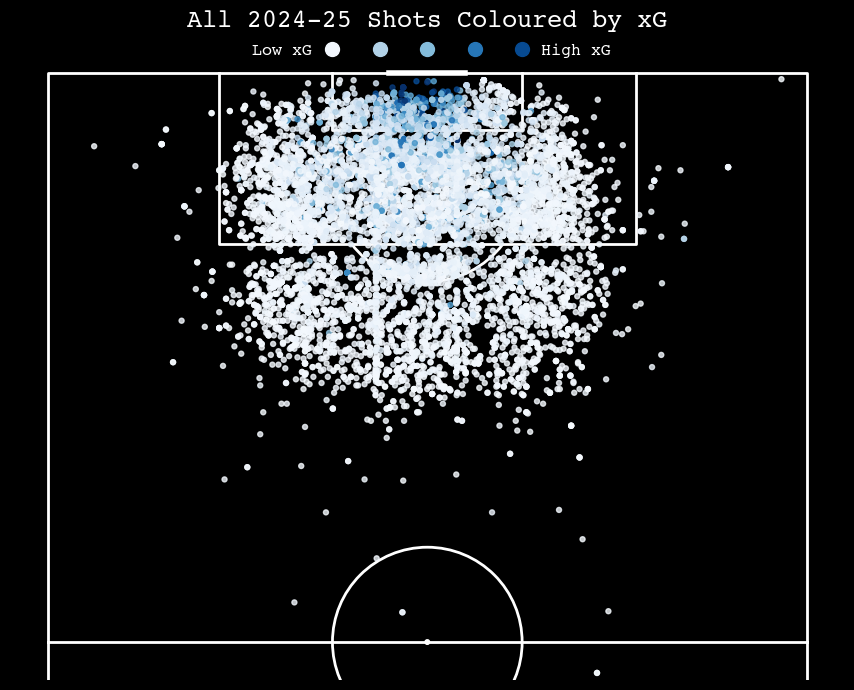

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from mplsoccer import Pitch, Sbopen, VerticalPitch

# print(shots_large_data_2024['x'].min())
# print(shots_large_data_2024['y'].min())

shots_large_data_2024_rescaled = shots_large_data_2024.copy()
rescale_value = 8/7
shots_large_data_2024_rescaled['x_rescaled'] = shots_large_data_2024_rescaled['x']*rescale_value
shots_large_data_2024_rescaled['y_rescaled'] = shots_large_data_2024_rescaled['y']*rescale_value


pitch = VerticalPitch(line_color='white',pitch_color='black', half=True)
fig, ax = pitch.draw(figsize=(10, 7))
fig.patch.set_facecolor('black')
pitch.scatter(shots_large_data_2024_rescaled['x_rescaled'], shots_large_data_2024_rescaled['y_rescaled'], c=shots_large_data_2024['expectedGoals'], cmap='Blues', s=13, alpha=0.8, ax=ax)
pitch.scatter(122.5, 30, c='#f2f7fd', s=100, ax=ax)
pitch.scatter(122.5, 35, c='#b2d2e8', s=100, ax=ax)
pitch.scatter(122.5, 40, c='#84bcdb', s=100, ax=ax)
pitch.scatter(122.5, 45, c='#2676b7', s=100, ax=ax)
pitch.scatter(122.5, 50, c='#074a91', s=100, ax=ax)
pitch.text(121.9, 21.5, s='Low xG', fontdict={'family': 'Courier', 'weight': 'bold', 'size': 12, 'color':'white'}, ax=ax)
pitch.text(121.9, 52, s='High xG', fontdict={'family': 'Courier', 'weight': 'bold', 'size': 12, 'color':'white'}, ax=ax)




plt.title(
    'All 2024-25 Shots Coloured by xG',
    fontdict={'family': 'Courier', 'weight': 'bold', 'size': 18, 'color':'white'})
plt.savefig('plots/allshotsplot_2.png', dpi=300)
plt.show()

In [20]:
# Building a model to predict the location on goal based on other factors
import statsmodels.api as sm
import numpy as np

all_shots_no_blocks = all_shots_rescaled[all_shots_rescaled['isBlocked'] == False]
all_shots_no_blocks_with_dummies = pd.get_dummies(all_shots_no_blocks, columns=['shotType', 'SCA 1_Event', 'situation', 'Unnamed: 8_level_0_Notes'], dtype=int)
all_shots_no_blocks_with_dummies.head()

,Unnamed: 0,id,playerName,eventType,teamId,playerId,x,y,min,period,...,situation_FromCorner,situation_IndividualPlay,situation_RegularPlay,situation_SetPiece,situation_ThrowInSetPiece,Unnamed: 8_level_0_Notes_Deflected,"Unnamed: 8_level_0_Notes_Deflected, Volley",Unnamed: 8_level_0_Notes_Free kick,"Unnamed: 8_level_0_Notes_Free kick, Deflected",Unnamed: 8_level_0_Notes_Volley
2,NaN,2709591459,Luis Diaz,Miss,8650,860914,87.211765,42.466250,48,SecondHalf,...,0,0,1,0,0,0,0,0,0,0
3,NaN,2709596929,Luis Diaz,Miss,8650,860914,100.637931,35.982500,55,SecondHalf,...,0,0,1,0,0,0,0,0,0,0
5,NaN,2713407797,Luis Diaz,Goal,8650,860914,91.600000,38.872619,13,FirstHalf,...,0,0,0,0,0,0,0,0,0,0
7,NaN,2713478823,Luis Diaz,AttemptSaved,8650,860914,92.200000,32.017500,64,SecondHalf,...,0,0,1,0,0,0,0,0,0,0
8,NaN,2716419067,Luis Diaz,Goal,8650,860914,100.827586,38.368333,35,FirstHalf,...,0,0,1,0,0,0,0,0,0,0


In [21]:
all_shots_no_blocks_on_target = all_shots_no_blocks[all_shots_no_blocks['isOnTarget'] == True]
print(all_shots_no_blocks_on_target['onGoalShot.y.rescaled'].max())
print(all_shots_no_blocks_on_target['onGoalShot.y.rescaled'].min())
difference = (all_shots_no_blocks_on_target['onGoalShot.y.rescaled'].max() - all_shots_no_blocks_on_target['onGoalShot.y.rescaled'].min())/2
print(2*difference+all_shots_no_blocks_on_target['onGoalShot.x.rescaled'].min())
print(0.623419657195767/2)

0.623419657195767
0.010192146984127
0.6853174573015852
0.3117098285978835


In [22]:
conditions = [ 
    (all_shots_no_blocks['onGoalShot.x.rescaled'] < 0.684),
    
    (all_shots_no_blocks['onGoalShot.x.rescaled'] >= 0.684) & 
    (all_shots_no_blocks['onGoalShot.x.rescaled'] < 1.296),
    
    (all_shots_no_blocks['onGoalShot.x.rescaled'] >= 1.296) 
]

choices = ['Left', 'Middle', 'Right']

all_shots_no_blocks['goalxZone'] = np.select(conditions, choices, default='Missed')

conditionsy = [
    (all_shots_no_blocks['onGoalShot.y.rescaled'] > 0) & 
    (all_shots_no_blocks['onGoalShot.y.rescaled'] < 0.3117),
    
    (all_shots_no_blocks['onGoalShot.y.rescaled'] >= 0.3117)
]
choicesy = ['Bottom', 'Top']
all_shots_no_blocks['goalyZone'] = np.select(conditionsy, choicesy, default='Missed')
all_shots_no_blocks['goalZone'] = all_shots_no_blocks['goalxZone']+' '+all_shots_no_blocks['goalyZone']

all_shots_no_blocks.head()

/var/folders/r2/l3m1j7vd1djg8cftzv5dx7200000gn/T/ipykernel_99623/1831886509.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_shots_no_blocks['goalxZone'] = np.select(conditions, choices, default='Missed')
/var/folders/r2/l3m1j7vd1djg8cftzv5dx7200000gn/T/ipykernel_99623/1831886509.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_shots_no_blocks['goalyZone'] = np.select(conditionsy, choicesy, default='Missed')
/var/folders/r2/l3m1j7vd1djg8cftzv5dx7200000gn/T/ipykernel_99623/1831886509.py:22: S

,Unnamed: 0,id,playerName,eventType,shotType,situation,teamId,playerId,x,y,...,Unnamed: 8_level_0_Notes,SCA 1_Player,SCA 1_Event,SCA 2_Player,SCA 2_Event,onGoalShot.x.rescaled,onGoalShot.y.rescaled,goalxZone,goalyZone,goalZone
2,NaN,2709591459,Luis Diaz,Miss,RightFoot,RegularPlay,8650,860914,87.211765,42.466250,...,NaN,Luis Díaz,Take-On,Dominik Szoboszlai,Pass (Live),6.700098,1.658858,Right,Top,Right Top
3,NaN,2709596929,Luis Diaz,Miss,RightFoot,RegularPlay,8650,860914,100.637931,35.982500,...,NaN,Trent Alexander-Arnold,Pass (Live),Diogo Jota,Pass (Live),2.099963,0.957708,Right,Top,Right Top
5,NaN,2713407797,Luis Diaz,Goal,LeftFoot,FastBreak,8650,860914,91.600000,38.872619,...,NaN,Diogo Jota,Pass (Live),NaN,NaN,0.495701,0.248009,Left,Bottom,Left Bottom
7,NaN,2713478823,Luis Diaz,AttemptSaved,RightFoot,RegularPlay,8650,860914,92.200000,32.017500,...,NaN,Mohamed Salah,Pass (Live),Mohamed Salah,Take-On,1.806878,0.064550,Right,Bottom,Right Bottom
8,NaN,2716419067,Luis Diaz,Goal,Header,RegularPlay,8650,860914,100.827586,38.368333,...,NaN,Mohamed Salah,Pass (Live),Ryan Gravenberch,Pass (Live),0.293981,0.409385,Left,Top,Left Top


In [23]:
all_shots_no_blocks_location_dummies = pd.get_dummies(all_shots_no_blocks, columns=['goalZone'], dtype=int)
all_shots_no_blocks_location_dummies['expectedGoalsOnTarget'] = all_shots_no_blocks_location_dummies['expectedGoalsOnTarget'].astype(float)
all_shots_no_blocks_location_dummies = all_shots_no_blocks_location_dummies[all_shots_no_blocks_location_dummies['expectedGoalsOnTarget'].notna()]

all_shots_no_blocks_location_dummies_on_target = all_shots_no_blocks_location_dummies[all_shots_no_blocks_location_dummies['isOnTarget'] == True]
X = all_shots_no_blocks_location_dummies[['x', 'y', 'goalZone_Left Bottom', 'goalZone_Left Top',
       'goalZone_Middle Bottom',
       'goalZone_Middle Top',
       'goalZone_Right Bottom', 'goalZone_Right Top']]
X = X.apply(pd.to_numeric, errors='coerce')
X = sm.add_constant(X)
y = all_shots_no_blocks_location_dummies['expectedGoalsOnTarget']
print(y.isna().sum())  # Should be 0


model = sm.OLS(y, X) 
results = model.fit()
predictions = results.predict(X)
all_shots_no_blocks_location_dummies['predicted_xGOTzone'] = predictions
all_shots_no_blocks_location_dummies.to_csv('outputs/all_shots_with_predicted_xgotzone_value.csv')
print(results.summary())

0
                              OLS Regression Results                             
Dep. Variable:     expectedGoalsOnTarget   R-squared:                       0.122
Model:                               OLS   Adj. R-squared:                  0.121
Method:                    Least Squares   F-statistic:                     125.9
Date:                   Sun, 27 Apr 2025   Prob (F-statistic):          6.20e-174
Time:                           14:31:43   Log-Likelihood:                 100.36
No. Observations:                   6340   AIC:                            -184.7
Df Residuals:                       6332   BIC:                            -130.7
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [24]:
all_shots_no_blocks_location_dummies_goals = pd.get_dummies(all_shots_no_blocks_location_dummies, columns=['eventType', 'shotType', 'SCA 1_Event'], dtype=int)

columns_to_drop = ['Unnamed: 0','eventType', 'id', 'playerName','situation', 'teamId',
       'playerId','min', 'period', 'isOwnGoal', 'isBlocked',
       'isSavedOffLine', 'isFromInsideBox', 'blockedX',
       'blockedY', 'goalCrossedY', 'goalCrossedZ', 'expectedGoals',
       'expectedGoalsOnTarget', 'box', 'homeTeamId', 'awayTeamId',
       'homeTeamName', 'awayTeamName', 'homeScore', 'awayScore', 'matchId',
       'matchDate', 'teamColor', 'teamColorDark', 'onGoalShot.x',
       'onGoalShot.y', 'onGoalShot.zoomRatio', 'minAdded', '', 'min1',
       'Unnamed: 2_level_0_Squad', 'Unnamed: 5_level_0_Outcome',
       'Unnamed: 6_level_0_Distance', 'Unnamed: 7_level_0_Body Part',
       'Unnamed: 8_level_0_Notes', 'SCA 1_Player', 'SCA 1_Event',
       'SCA 2_Player', 'SCA 2_Event', 'onGoalShot.x.rescaled',
       'onGoalShot.y.rescaled', 'goalxZone', 'goalyZone',
       'predicted_xGOTzone', 'eventType_AttemptSaved',
       'eventType_Miss', 'eventType_Post']

columns_to_drop = [col for col in columns_to_drop if col in all_shots_no_blocks_location_dummies_goals.columns]
all_shots_no_blocks_location_dummies_logit = all_shots_no_blocks_location_dummies_goals.drop(columns=columns_to_drop)
print(len(all_shots_no_blocks_location_dummies_logit))
all_shots_no_blocks_location_dummies_logit.columns

6340


Index(['x', 'y', 'isOnTarget', 'goalZone_Left Bottom', 'goalZone_Left Top',
       'goalZone_Middle Bottom', 'goalZone_Middle Top',
       'goalZone_Right Bottom', 'goalZone_Right Top', 'eventType_Goal',
       'shotType_Header', 'shotType_LeftFoot', 'shotType_OtherBodyParts',
       'shotType_RightFoot', 'SCA 1_Event_Fouled', 'SCA 1_Event_Interception',
       'SCA 1_Event_Pass (Dead)', 'SCA 1_Event_Pass (Live)',
       'SCA 1_Event_Shot', 'SCA 1_Event_Tackle', 'SCA 1_Event_Take-On'],
      dtype='object')

#### Figure two shows a picture of a goal overlaid with shots taken in the current Premier League season coloured by their post-shot expected goals value (PSxG, sometimes referred to as expected goals on target). PSxG acts to evaluate the probability of the shot going in based on the position it crosses the goalline, the angle and distance the shot is taken from and particularly the speed of the shot, hence explaining much of the variation that can be observed in figure 2. A very simple way of creating a measure of shot quality therefore is how much does a player improve their chance of scoring from the point where they are about to shoot to after they have taken the shot.

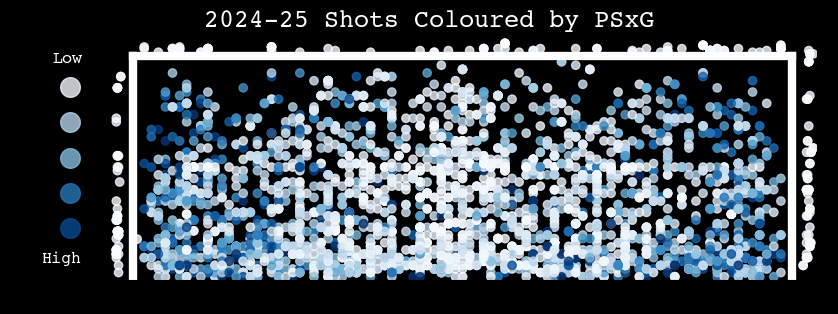

In [25]:
psxg_df = all_shots_no_blocks.copy()
psxg_df = psxg_df[psxg_df['onGoalShot.x.rescaled'] > 0.01]
fig, ax = plt.subplots(figsize=(10, 4))
ax.scatter(psxg_df['onGoalShot.x.rescaled'], psxg_df['onGoalShot.y.rescaled'], c=psxg_df['expectedGoalsOnTarget'], cmap='Blues', alpha=0.8)
linecolour = 'white'
ax.set_facecolor('black')
fig.patch.set_facecolor('black')
ax.plot([0.06,0.06], [0, 0.64], color=linecolour, linewidth=6)
ax.plot([1.94,1.94], [0, 0.64], color=linecolour, linewidth=6)
ax.plot([0.06,1.94], [0.64, 0.64], color=linecolour, linewidth=6)
ax.scatter(-0.12, 0.55, c='#f2f7fd', s=200, alpha=0.8)
ax.scatter(-0.12, 0.45, c='#b2d2e8', s=200, alpha=0.8)
ax.scatter(-0.12, 0.35, c='#84bcdb', s=200, alpha=0.8)
ax.scatter(-0.12, 0.25, c='#2676b7', s=200, alpha=0.8)
ax.scatter(-0.12, 0.15, c='#074a91', s=200, alpha=0.8)
ax.text(-0.17, 0.62, s='Low', fontdict={'family': 'Courier', 'weight': 'bold', 'size': 12, 'color':'white'})
ax.text(-0.2, 0.05, s='High', fontdict={'family': 'Courier', 'weight': 'bold', 'size': 12, 'color':'white'})



plt.title(
    '2024-25 Shots Coloured by PSxG',
    fontdict={'family': 'Courier', 'weight': 'bold', 'size': 18, 'color':'white'})

ax.set_aspect('equal')
ax.set_xlim(-0.2, 2.01)
ax.set_ylim(0, 0.7)
plt.savefig('plots/psxg_2.png', dpi=300)
plt.show()

In [26]:
def xg_diff_list(all_players, players, shots_df):
    xg_diff = []
    shots = []
    goals = []
    expected_goals = []
    goals_minus_xg = []
    for i in all_players:
        if i in players:
            stats = shots_df[shots_df['Unnamed: 1_level_0_Player'] == i]
            # xgstats = stats.copy()
            # xgstats['Unnamed: 4_level_0_PSxG'] = xgstats['Unnamed: 4_level_0_PSxG'].fillna(0)
            xg_diff_mean = stats['psxG_minus_xG'].fillna(0).mean()
            xg_diff.append(round(xg_diff_mean, 4))
            shots.append(len(stats))
            xg = stats['Unnamed: 3_level_0_xG'].sum()
            expected_goals.append(xg)
            goals_df = stats[stats['Unnamed: 5_level_0_Outcome'] == 'Goal']
            g = len(goals_df)
            goals.append(g)
            g_m_xg = float(g) - float(xg)
            goals_minus_xg.append(g_m_xg)
        else:
            xg_diff.append(None)
            shots.append(None)
            goals.append(None)
            expected_goals.append(None)
            goals_minus_xg.append(None)
    return xg_diff, shots, goals, expected_goals, goals_minus_xg

xg_diff_19, shots_19, goals_19, expected_goals_19, goals_minus_xg_19 = xg_diff_list(all_players, players_2019, shots_2019_df)
xg_diff_20, shots_20, goals_20, expected_goals_20, goals_minus_xg_20 = xg_diff_list(all_players, players_2020, shots_2020_df)
xg_diff_21, shots_21, goals_21, expected_goals_21, goals_minus_xg_21 = xg_diff_list(all_players, players_2021, shots_2021_df)
xg_diff_22, shots_22, goals_22, expected_goals_22, goals_minus_xg_22 = xg_diff_list(all_players, players_2022, shots_2022_df)
xg_diff_23, shots_23, goals_23, expected_goals_23, goals_minus_xg_23 = xg_diff_list(all_players, players_2023, shots_2023_df)

data = {'player':all_players, 'xg_diff_19':xg_diff_19, 'xg_diff_20':xg_diff_20, 
        'xg_diff_21':xg_diff_21, 'xg_diff_22':xg_diff_22, 'xg_diff_23':xg_diff_23, 'shots_19':shots_19,
        'shots_20':shots_20, 'shots_21':shots_21, 'shots_22':shots_22, 'shots_23':shots_23, 'goals_minus_xg_19':goals_minus_xg_19,
        'goals_minus_xg_20':goals_minus_xg_20,'goals_minus_xg_21':goals_minus_xg_21,'goals_minus_xg_22':goals_minus_xg_22,
        'goals_minus_xg_23':goals_minus_xg_23,}

xg_diff_regression = pd.DataFrame(data)
long_xg_regression_df = pd.wide_to_long(
    xg_diff_regression,
    stubnames=['xg_diff', 'shots', 'goals_minus_xg'],
    i='player',
    j='season',
    sep='_',
    suffix='\\d+'
).reset_index()
long_xg_regression_df.to_csv('outputs/xg_diff_regression.csv')

cleaned_long_xg_reg_df = long_xg_regression_df[(long_xg_regression_df['goals_minus_xg'].notna()) & (long_xg_regression_df['xg_diff'].notna())]
cleaned_long_xg_reg_df = cleaned_long_xg_reg_df[cleaned_long_xg_reg_df['shots']>35]
cleaned_long_xg_reg_df['goal_diff_per_shot'] = cleaned_long_xg_reg_df['goals_minus_xg']/cleaned_long_xg_reg_df['shots']
cleaned_long_xg_reg_df.head()

,player,season,xg_diff,shots,goals_minus_xg,goal_diff_per_shot
1,Teemu Pukki,19,0.0477,78.0,-0.67,-0.008590
3,Mohamed Salah,19,0.0639,129.0,-0.79,-0.006124
4,Emi Buendía,19,0.0350,40.0,-1.23,-0.030750
6,Roberto Firmino,19,0.0570,99.0,-4.97,-0.050202
12,Trent Alexander-Arnold,19,0.0595,44.0,1.21,0.027500


In [27]:
X = sm.add_constant(cleaned_long_xg_reg_df['xg_diff'])
y = cleaned_long_xg_reg_df['goal_diff_per_shot']
model = sm.OLS(y, X) 
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     goal_diff_per_shot   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     153.6
Date:                Sun, 27 Apr 2025   Prob (F-statistic):           1.74e-30
Time:                        14:32:14   Log-Likelihood:                 817.02
No. Observations:                 444   AIC:                            -1630.
Df Residuals:                     442   BIC:                            -1622.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0522      0.005    -11.036      0.0

## **Why is shot quality important to look at?**

#### Shot quality’s importance boils down to the fact a player's shot quality is indicative of their ability to outperform their expected goals value, hence allowing them to score more and improve their team’s chances of winning. This relationship can be seen on a shot-by-shot basis in figure three which compares a players shot quality (PSxG minus xG) for the season and their goals minus expected goals for the same season. Through running a linear regression, shot quality had a 0.000 p-value suggesting it has effect on a players ability to outperform their expected goals value due to their shot quality, with a 0.258 R-squared value. Therefore now we can see that better shot quality is beneficial to player performance, it poses the question of if shot quality is something that players are able to control, hence making them potentially more valuable than other players.


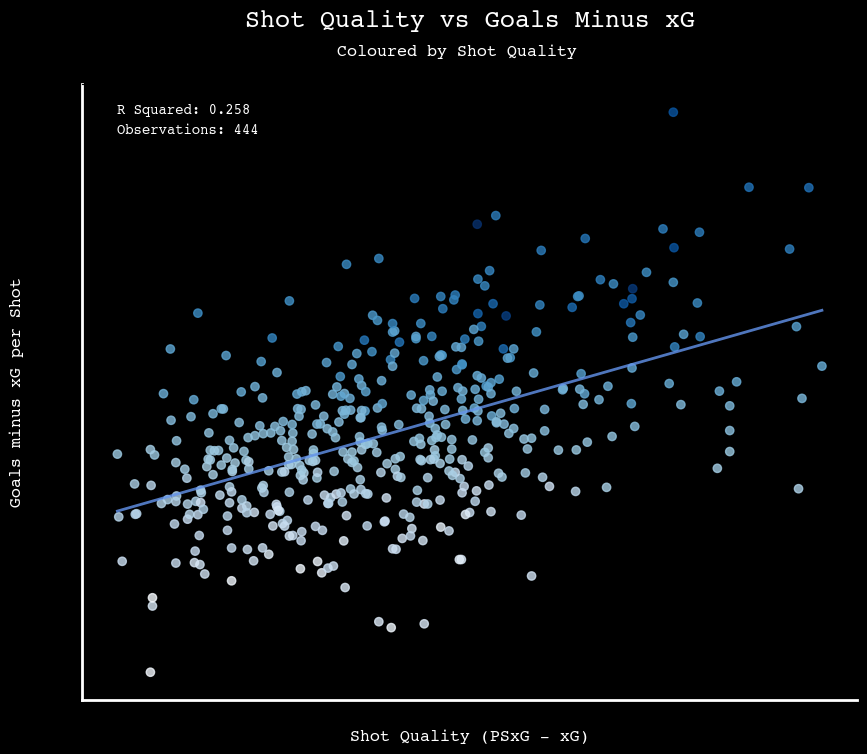

In [28]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(cleaned_long_xg_reg_df['xg_diff'], cleaned_long_xg_reg_df['goal_diff_per_shot'], c=cleaned_long_xg_reg_df['goals_minus_xg'], cmap='Blues', alpha=0.8)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.set_facecolor('black')
fig.patch.set_facecolor('black')
ax.set_xlabel('Shot Quality (PSxG - xG)', fontdict={'family': 'Courier', 'weight': 'bold', 'size': 12, 'color':'white'})
ax.set_ylabel('Goals minus xG per Shot', fontdict={'family': 'Courier', 'weight': 'bold', 'size': 12, 'color':'white'})
ax.text(0.01, 0.18,s='R Squared: '+str(round(results.rsquared,3)), fontdict={'family': 'Courier', 'weight': 'bold', 'size': 10, 'color':'white'})
ax.text(0.01, 0.169,s='Observations: '+str(len(cleaned_long_xg_reg_df)), fontdict={'family': 'Courier', 'weight': 'bold', 'size': 10, 'color':'white'})

x_range = np.linspace(cleaned_long_xg_reg_df['xg_diff'].min(), cleaned_long_xg_reg_df['xg_diff'].max(), 100)
X_range = sm.add_constant(x_range)
y_predict = results.predict(X_range)
ax.plot(x_range, y_predict, color='cornflowerblue', linestyle='-', linewidth=2, alpha=0.8)

plt.title(
    'Shot Quality vs Goals Minus xG',
    fontdict={'family': 'Courier', 'weight': 'bold', 'size': 18, 'color':'white'}, y=1.08)
plt.suptitle('Coloured by Shot Quality', fontdict={'family': 'Courier', 'color':'white'}, y=0.93)
plt.savefig('plots/goalsvsshotefficiency.png', dpi=300)
plt.show()

## **Another way to try quantifying shot quality**

#### It is interesting to try and look one step even further into shot quality using the data that is available, by creating a shot quality metric which is constructed around the position of the shot in the goal. Although this idea lacks the fairly key component to PSxG that is the speed of the shot, it will work to compare two similar metrics which in turn will emphasise the difference between the numbers rather than the numbers themselves. Even though this assumption isn’t necessarily accurate, this method will use the assumption that footballers hit the zone of the goal they are aiming for when taking a shot, breaking the goal into six different zones, between thirds of its width and top/bottom.


In [29]:
x_jpsxg = all_shots_no_blocks_location_dummies_logit.drop(['eventType_Goal'], axis=1)
y_jpsxg = all_shots_no_blocks_location_dummies_logit['eventType_Goal']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(x_jpsxg, y_jpsxg, test_size=0.2, random_state=42)
middled_model = LogisticRegression(max_iter=10000)
middled_model.fit(X_train, y_train)

y_pred_proba = middled_model.predict_proba(x_jpsxg)[:,1]
y_pred_proba[:10]

all_shots_no_blocks_location_dummies_goals['jpsxg'] = y_pred_proba
all_shots_no_blocks_location_dummies_goals['jpsxg - psxg'] = all_shots_no_blocks_location_dummies_goals['jpsxg'] - all_shots_no_blocks_location_dummies_goals['expectedGoalsOnTarget']
all_shots_no_blocks_location_dummies_goals.to_csv('outputs/data_with_jpsxg.csv')

In [30]:
columns_to_drop = ['Unnamed: 0','eventType', 'id', 'playerName','situation', 'teamId',
       'playerId','min', 'period', 'isOwnGoal', 'isBlocked',
       'isSavedOffLine', 'isFromInsideBox', 'blockedX',
       'blockedY', 'goalCrossedY', 'goalCrossedZ', 'expectedGoals',
       'expectedGoalsOnTarget', 'box', 'homeTeamId', 'awayTeamId',
       'homeTeamName', 'awayTeamName', 'homeScore', 'awayScore', 'matchId',
       'matchDate', 'teamColor', 'teamColorDark', 'onGoalShot.x',
       'onGoalShot.y', 'onGoalShot.zoomRatio', 'minAdded', '', 'min1',
       'Unnamed: 2_level_0_Squad', 'Unnamed: 5_level_0_Outcome',
       'Unnamed: 6_level_0_Distance', 'Unnamed: 7_level_0_Body Part',
       'Unnamed: 8_level_0_Notes', 'SCA 1_Player', 'SCA 1_Event',
       'SCA 2_Player', 'SCA 2_Event', 'goalxZone', 'goalyZone',
       'predicted_xGOTzone', 'eventType_AttemptSaved',
       'eventType_Miss', 'eventType_Post', 'jpsxg', 'jpsxg - psxg']

columns_to_drop = [col for col in columns_to_drop if col in all_shots_no_blocks_location_dummies_goals.columns]
shot_location_logit = all_shots_no_blocks_location_dummies_goals.drop(columns=columns_to_drop)
print(len(shot_location_logit))

x_goal_loc_jpsxg = shot_location_logit.drop(['eventType_Goal'], axis=1)
y_goal_loc_jpsxg = shot_location_logit['eventType_Goal']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(x_goal_loc_jpsxg, y_goal_loc_jpsxg, test_size=0.2, random_state=42)
middled_model = LogisticRegression(max_iter=10000)
middled_model.fit(X_train, y_train)

y_pred_proba = middled_model.predict_proba(x_goal_loc_jpsxg)[:,1]
y_pred_proba[:10]
print(len(y_pred_proba))

multiple_jpsxg_df = all_shots_no_blocks_location_dummies_goals.copy()
multiple_jpsxg_df['goal_loc_jpsxg'] = y_pred_proba
multiple_jpsxg_df = multiple_jpsxg_df[multiple_jpsxg_df['isOnTarget'] == True]
multiple_jpsxg_df['goal_loc_jpsxg - jpsxg'] = multiple_jpsxg_df['goal_loc_jpsxg'] - multiple_jpsxg_df['jpsxg']
multiple_jpsxg_df.to_csv('outputs/multiple_jpsxg_logits.csv')

6340
6340


#### By using logit regression I have created two different metrics that, at their roots, are less advanced PSxG models. The difference between the two models is that one uses only the zone of the goal to dictate the movement of the ball, whereas the other also incorporates the exact point the ball crosses the goal line. The theory behind this is that the “Zonal PSxG” model gives an overview of how likely that shot was to go in by an average professional footballer aiming at that zone, whereas the “Point PSxG” should provide a slight difference which suggests how much the players shot accuracy helped or hindered their chance of scoring.

In [31]:
multiple_jpsxg_players = multiple_jpsxg_df['playerName'].unique().tolist()
average_glp_vs_jp = []
goals = []
shots = []
xg_per_shot = []
total_xg = []

for i in multiple_jpsxg_players:
    player_data = multiple_jpsxg_df[multiple_jpsxg_df['playerName'] == i]
    avg_diff = player_data['goal_loc_jpsxg - jpsxg'].mean()
    average_glp_vs_jp.append(avg_diff)
    player_goals = player_data[player_data['eventType_Goal'] == 1]
    shot = len(player_data)
    shots.append(shot)
    gs = len(player_goals)
    goals.append(gs)
    xgps = player_data['expectedGoals'].mean()
    xg = player_data['expectedGoals'].sum()
    xg_per_shot.append(xgps)
    total_xg.append(xg)


multiple_data = {'playerName':multiple_jpsxg_players, 'shotQualityVsExpected':average_glp_vs_jp, 
                 'shots':shots, 'goals':goals, 'xGPerShot':xg_per_shot, 'totalxG':total_xg}
players_shot_quality = pd.DataFrame(multiple_data)
players_shot_quality['goalsPerShots'] = players_shot_quality['goals']/players_shot_quality['shots']
players_shot_quality['diffPerShot'] = players_shot_quality['goalsPerShots'] - players_shot_quality['xGPerShot']
players_shot_quality['goalsDiff'] = players_shot_quality['goals'] - players_shot_quality['totalxG']
players_shot_quality = players_shot_quality[players_shot_quality['shots']>10]
# plt.scatter(players_shot_quality['goalsDiff'], players_shot_quality['shotQualityVsExpected'])
players_shot_quality['goalsAddedByShotQuality'] = players_shot_quality['shotQualityVsExpected']*players_shot_quality['shots']
players_shot_quality.to_csv('outputs/player_shot_quality_logits.csv')

In [32]:
X1 = sm.add_constant(players_shot_quality['goalsAddedByShotQuality'])
y1 = players_shot_quality['diffPerShot']
model1 = sm.OLS(y1, X1) 
results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:            diffPerShot   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.2449
Date:                Sun, 27 Apr 2025   Prob (F-statistic):              0.622
Time:                        14:32:45   Log-Likelihood:                 69.892
No. Observations:                  87   AIC:                            -135.8
Df Residuals:                      85   BIC:                            -130.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

#### An example of how this method works can be seen in figure 4, this shows an example of a shot by Mateus Fernandes against Brentford. The official PSxG, of course containing much more information and training off a larger dataset, deems the shot to have a 15% chance of going in. The difference between the Zonal PSxG and Point PSxG suggest that the positioning of Fernandes’ shot reduced his chances of scoring compared to other shots which have been taken at that angle and aimed at that zone. This can further be seen when comparing the shot to some taken and shot at a similar place, which were deemed to have a higher PSxG on average at 28%, but also a higher Point PSxG value. The third option shown on Figure 4 is the average PSxG value of shots which hit outside the zone that Fernandes shot at, which have a higher PSxG value on average as well.

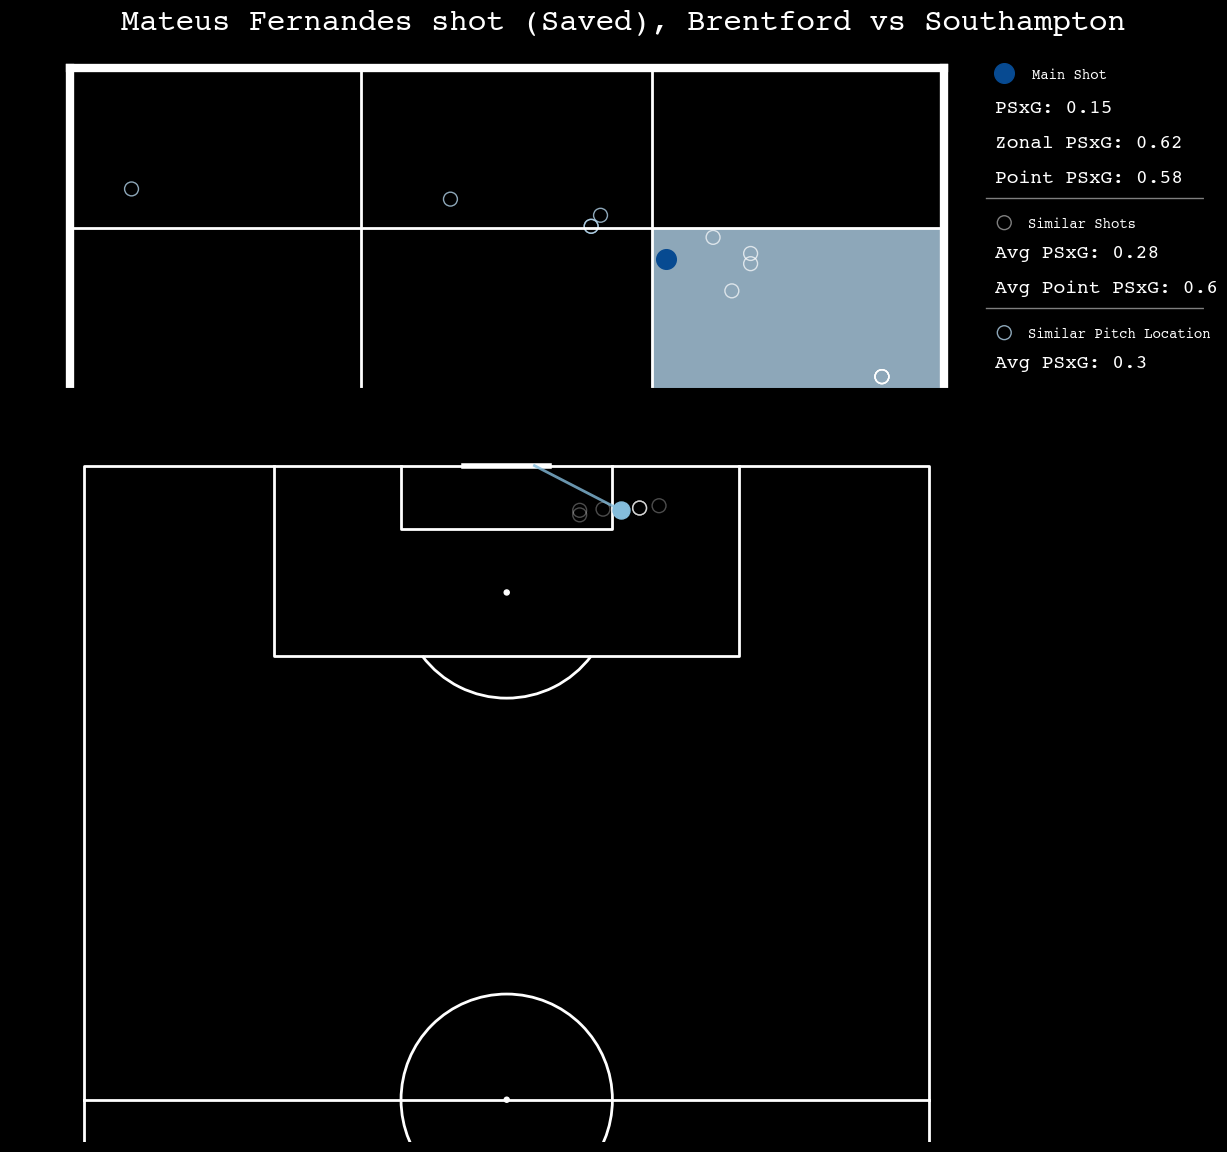

In [33]:
from matplotlib.patches import Rectangle
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
box = ax2.get_position()
ax2.set_position([box.x0, box.y0-0.5, box.width * 0.8, box.height * 3])
shot_data = multiple_jpsxg_df.iloc[3000]
# print(shot_data)
fig.patch.set_facecolor('black')
lc = 'white'
similar_shots = multiple_jpsxg_df[(multiple_jpsxg_df['goalxZone'] == shot_data['goalxZone']) &
                                  (multiple_jpsxg_df['goalyZone'] == shot_data['goalyZone']) &
                                  (multiple_jpsxg_df['x']*(8/7) < shot_data['x']*(8/7) + 0.5) &
                                  (multiple_jpsxg_df['x']*(8/7) > shot_data['x']*(8/7) - 0.5) &
                                  (multiple_jpsxg_df['y']*(8/7) < shot_data['y']*(8/7) + 5) &
                                  (multiple_jpsxg_df['y']*(8/7) > shot_data['y']*(8/7) - 5)]

similar_shots_average_psxg = similar_shots['expectedGoalsOnTarget'].mean()
similar_shots_average_point_psxg = similar_shots['goal_loc_jpsxg'].mean()

similar_shots_different_place = multiple_jpsxg_df[(multiple_jpsxg_df['goalxZone'] != shot_data['goalxZone']) &
                                  (multiple_jpsxg_df['goalyZone'] != shot_data['goalyZone']) &
                                  (multiple_jpsxg_df['x']*(8/7) < shot_data['x']*(8/7) + 0.5) &
                                  (multiple_jpsxg_df['x']*(8/7) > shot_data['x']*(8/7) - 0.5) &
                                  (multiple_jpsxg_df['y']*(8/7) < shot_data['y']*(8/7) + 5) &
                                  (multiple_jpsxg_df['y']*(8/7) > shot_data['y']*(8/7) - 5)]

similar_shots_different_place_psxg = similar_shots_different_place['expectedGoalsOnTarget'].mean()

if shot_data['goalxZone'] == 'Left' and shot_data['goalyZone'] == 'Top':
    rect = Rectangle((0.06, 0.32), (1.88/3), 0.32, color='#b2d2e8', alpha=0.8)
    ax1.add_patch(rect)
elif shot_data['goalxZone'] == 'Left' and shot_data['goalyZone'] == 'Bottom':
    rect = Rectangle((0.06, 0), (1.88/3), 0.32, color='#b2d2e8', alpha=0.8)
    ax1.add_patch(rect)
elif shot_data['goalxZone'] == 'Middle' and shot_data['goalyZone'] == 'Top':
    rect = Rectangle((0.686667, 0.32), (1.88/3), 0.32, color='#b2d2e8', alpha=0.8)
    ax1.add_patch(rect)
elif shot_data['goalxZone'] == 'Middle' and shot_data['goalyZone'] == 'Bottom':
    rect = Rectangle((0.686667, 0), (1.88/3), 0.32, color='#b2d2e8', alpha=0.8)
    ax1.add_patch(rect)
elif shot_data['goalxZone'] == 'Right' and shot_data['goalyZone'] == 'Top':
    rect = Rectangle((1.313333, 0.32), (1.88/3), 0.32, color='#b2d2e8', alpha=0.8)
    ax1.add_patch(rect)
elif shot_data['goalxZone'] == 'Right' and shot_data['goalyZone'] == 'Bottom':
    rect = Rectangle((1.313333, 0), (1.88/3), 0.32, color='#b2d2e8', alpha=0.8)
    ax1.add_patch(rect)

for index,row in similar_shots.iterrows():
    ax1.scatter(row['onGoalShot.x.rescaled'], row['onGoalShot.y.rescaled'], facecolors='none', edgecolors='white', s=100, alpha=0.7)

for index,row in similar_shots_different_place.iterrows():
    ax1.scatter(row['onGoalShot.x.rescaled'], row['onGoalShot.y.rescaled'], facecolors='none', edgecolors='#b2d2e8', s=100, alpha=0.8)

ax1.plot([0.06,0.06], [0, 0.64], color=lc, linewidth=6)
ax1.plot([1.94,1.94], [0, 0.64], color=lc, linewidth=6)
ax1.plot([0.06,1.94], [0.64, 0.64], color=lc, linewidth=6)
ax1.plot([0.686667,0.686667], [0, 0.64], color=lc, linewidth=2)
ax1.plot([1.313333,1.313333], [0, 0.64], color=lc, linewidth=2)
ax1.plot([0.06,1.94], [0.32, 0.32], color=lc, linewidth=2)
ax1.scatter(shot_data['onGoalShot.x.rescaled'], shot_data['onGoalShot.y.rescaled'], c='#074a91', s=200, alpha=1)
ax1.text(2.05, 0.55, s='PSxG: '+str(round(shot_data['expectedGoalsOnTarget'], 2)), fontdict={'family': 'Courier', 'weight': 'bold', 'size': 14, 'color':'white'})
ax1.text(2.05, 0.48, s='Zonal PSxG: '+str(round(shot_data['jpsxg'], 2)), fontdict={'family': 'Courier', 'weight': 'bold', 'size': 14, 'color':'white'})
ax1.text(2.05, 0.41, s='Point PSxG: '+str(round(shot_data['goal_loc_jpsxg'], 2)), fontdict={'family': 'Courier', 'weight': 'bold', 'size': 14, 'color':'white'})
ax1.set_title(str(shot_data['playerName'])+' shot ('+str(shot_data['Unnamed: 5_level_0_Outcome'])+'), '+str(shot_data['homeTeamName'])+' vs '+str(shot_data['awayTeamName']), fontdict={'family': 'Courier', 'weight': 'bold', 'size': 22, 'color': 'white'})
ax1.scatter(2.07, 0.63, c='#074a91', s=200, alpha=1)
ax1.scatter(2.07, 0.33, facecolors='none', edgecolors='white', s=100, alpha=0.5)
ax1.text(2.12, 0.32, s='Similar Shots', fontdict={'family': 'Courier', 'weight': 'bold', 'size': 10, 'color':'white'})
ax1.text(2.13, 0.618, s='Main Shot', fontdict={'family': 'Courier', 'weight': 'bold', 'size': 10, 'color':'white'})
ax1.text(2.05, 0.26, s='Avg PSxG: '+str(round(similar_shots_average_psxg, 2)), fontdict={'family': 'Courier', 'weight': 'bold', 'size': 14, 'color':'white'})
ax1.text(2.05, 0.19, s='Avg Point PSxG: '+str(round(similar_shots_average_point_psxg, 2)), fontdict={'family': 'Courier', 'weight': 'bold', 'size': 14, 'color':'white'})
ax1.scatter(2.07, 0.11, facecolors='none', edgecolors='#b2d2e8', s=100, alpha=0.8)
ax1.text(2.12, 0.1, s='Similar Pitch Location', fontdict={'family': 'Courier', 'weight': 'bold', 'size': 10, 'color':'white'})
ax1.text(2.05, 0.04, s='Avg PSxG: '+str(round(similar_shots_different_place_psxg, 2)), fontdict={'family': 'Courier', 'weight': 'bold', 'size': 14, 'color':'white'})
ax1.plot([2.03, 2.9], [0.38, 0.38], color='white', linewidth=1, alpha=0.5)
ax1.plot([2.03, 2.9], [0.16, 0.16], color='white', linewidth=1, alpha=0.5)





ax1.set_facecolor('black')
ax1.set_xlim(0.0, 2.5)
ax1.set_ylim(0, 0.7)

pitch = VerticalPitch(line_color='white', pitch_color='black', half=True)
pitch.draw(ax=ax2)

for index,row in similar_shots.iterrows():
    ax2.scatter(80-row['y']*8/7, row['x']*8/7, facecolors='none', edgecolors='white', s=100, alpha=0.3)

ax2.scatter(80-shot_data['y']*8/7, shot_data['x']*8/7, c='#84bcdb', s=150, alpha=1)
ax2.plot(
    [80-shot_data['y']*8/7, 80-shot_data['goalCrossedY']*8/7], 
    [shot_data['x']*8/7, 120],                           
    lw=2, c='#84bcdb', alpha=0.8
)
plt.savefig('plots/shot_figure.png', dpi=300)

#### Despite this being an interesting method and attempt to draw insight from how accurate players are at shooting, the simplicity of the PSxG models that are being trained have resulted in the metrics having poor predictive power and therefore use in evaluating players. Running linear regressions between this shot quality metric (Point PSxG minus PSxG) and ability to outperform expected goals, yields no correlation between the two, hence in the shot quality metric’s current form it is not useful. With a more accurate model it may have some use, but would need extensive testing to provide an answer.

#### **Is shot quality consistent over time and players?**

#### Let’s return to using PSxG minus xG as the best measure we have of shot quality and turn to the main question as to whether players have control over this quality between themselves and over time. Figure 5 gives a fairly good representation of how shot quality changes across the league, between players and over time. For the seventy nine, players that played in the Premier League for the five seasons from the 2019/20 season to the 2023/24 season, each contains a set of box plots showing the spread of shot qualities for the respective season, overlaid with a line graph showing the shot quality for the respective player. Even though some variation can be attributed to small sample size in some particular season, there is clearly little consistency over time for the majority of players, shown by the large swings of the line graphs. This is further backed up by running a linear regression to compare how good a predictor previous year shot quality is for the next year. With an R-squared value of 0.008 and p-value of 0.118 this further suggests that there is no relationship over time.

In [34]:
player_shot_quality = pd.read_csv('shots_dfs/xg_diff_df.csv')
player_shot_quality.notnull().all(axis=1).sum()
shots_all_years = player_shot_quality.notnull().all(axis=1)
filtered_shots = player_shot_quality[shots_all_years]
filtered_shots.to_csv('shots_all_years.csv', index=False)

In [35]:
all_shot_efficiency = filtered_shots['xg_diff_19'].tolist()
all_shot_efficiency.extend(filtered_shots['xg_diff_20'].tolist())
all_shot_efficiency.extend(filtered_shots['xg_diff_21'].tolist())
all_shot_efficiency.extend(filtered_shots['xg_diff_22'].tolist())

next_year_shots = filtered_shots['xg_diff_20'].tolist()
next_year_shots.extend(filtered_shots['xg_diff_21'].tolist())
next_year_shots.extend(filtered_shots['xg_diff_22'].tolist())
next_year_shots.extend(filtered_shots['xg_diff_23'].tolist())
consecutive_year_data = {'year_efficiency':all_shot_efficiency, 'next_year_efficiency':next_year_shots}
consecutive_year_df = pd.DataFrame(consecutive_year_data)

print(len(all_shot_efficiency), len(next_year_shots))

316 316


In [36]:
X = sm.add_constant(consecutive_year_data['year_efficiency'])
y = consecutive_year_data['next_year_efficiency']
model = sm.OLS(y, X) 
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.454
Date:                Sun, 27 Apr 2025   Prob (F-statistic):              0.118
Time:                        14:33:06   Log-Likelihood:                 351.57
No. Observations:                 316   AIC:                            -699.1
Df Residuals:                     314   BIC:                            -691.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1440      0.010     15.148      0.0

#### In terms of looking across players there is seemingly similar randomness. A few players can be seen to be fairly consistently above the median on the box plots, such as Mo Salah (row one, column 2), Son Heung-Min (row 8, column 7) and in particular Miguel Almiron (row 4, column 6) who had a run of performing above the 75th percentile for the first four years of data. This lack of consistency does possibly suggest that players may experience regression towards the mean over time when outperforming their expected goals, which is what you’d hope to expect. The quality of players therefore comes down to their ability to get into positions that would maximise their xG and then further maximise their shot quality where they can. Although there is no data to check, higher shot velocity likely would lead to better PSxG (if the shot is on target) as well as placement of the shot which are inherently some players can be better at than others. 


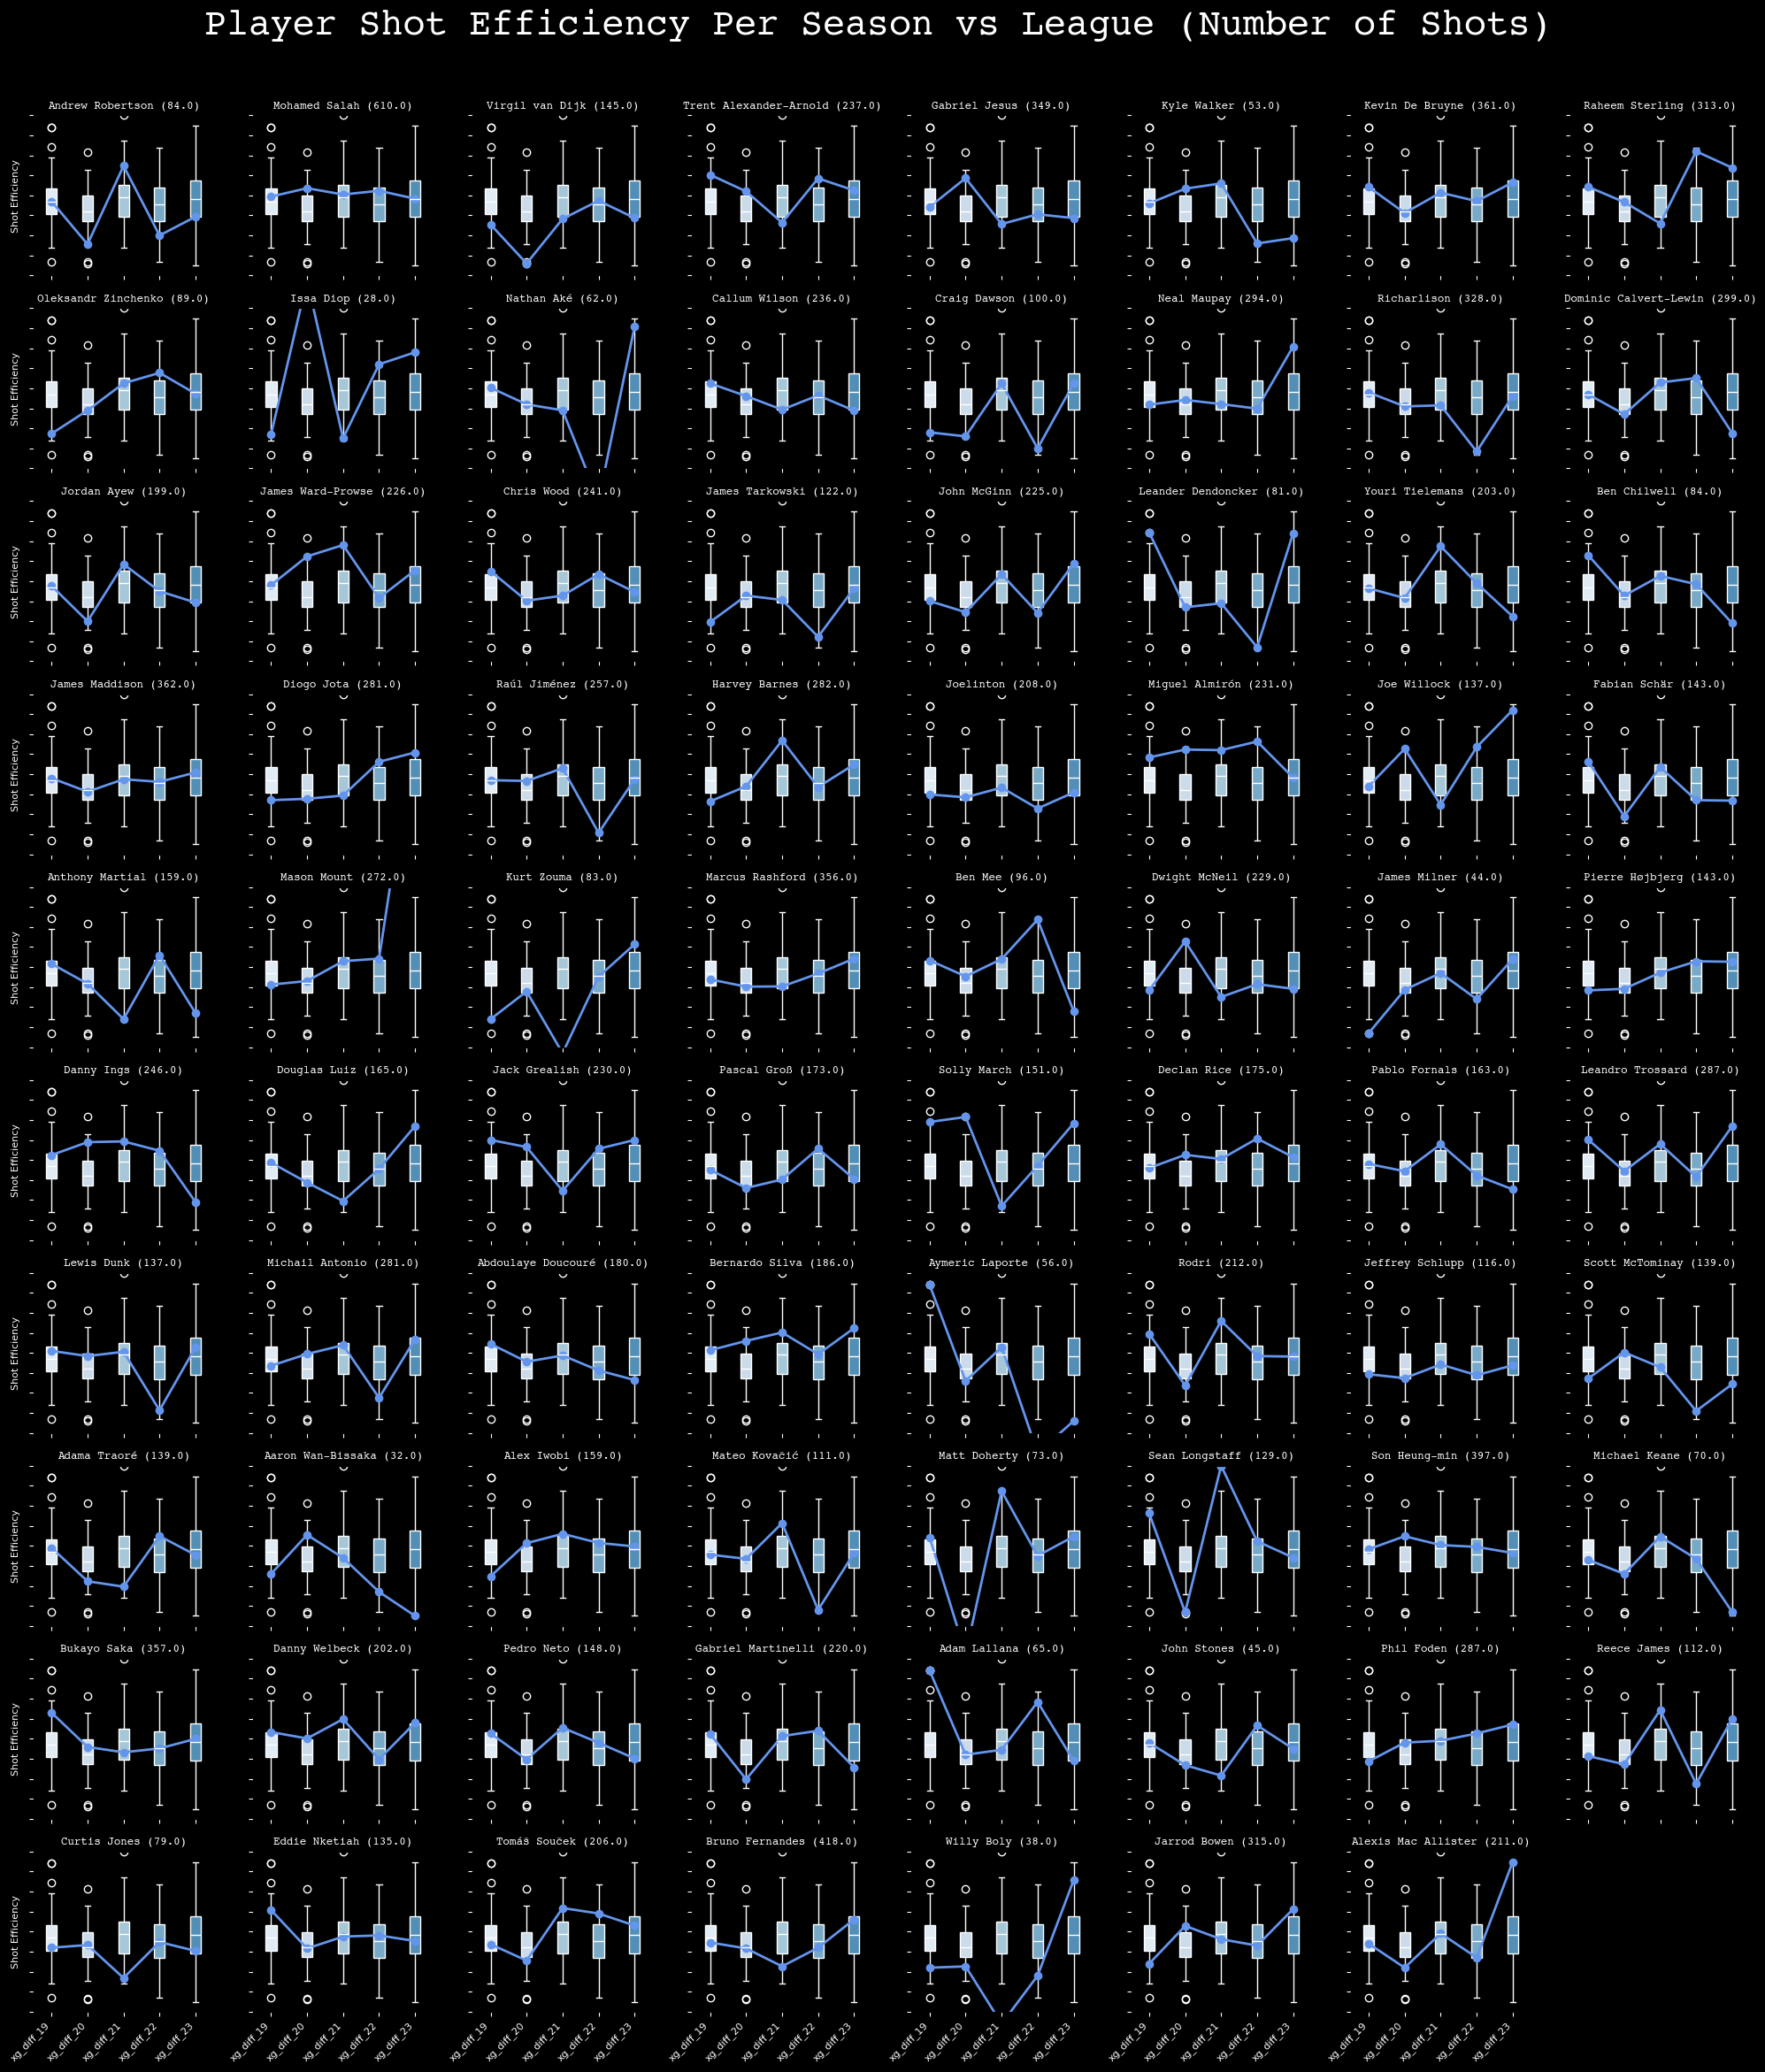

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

n_rows = filtered_shots.shape[0]
n_cols = 8
n_rows_plot = 10 
fig, axes = plt.subplots(n_rows_plot, n_cols, figsize=(20, 25), sharex=True, sharey=True)

axes = axes.flatten()

for i, (index, row) in enumerate(filtered_shots.iterrows()):
    ax = axes[i]
    player_data = row.iloc[2:7].values
    player_name = str(row.iloc[1])+' ('+str(row.iloc[-1])+')'
    x_positions = np.arange(len(player_data))
    sns.boxplot(data=filtered_shots.iloc[:, 1:], ax=ax, linecolor='white', palette=sns.color_palette("Blues", n_colors=7), width=0.3)
    ax.plot(x_positions, player_data, 'o-', color='cornflowerblue', linewidth=2, markersize=6, label=player_name)

    ax.set_facecolor('black')
    ax.set_ylim(-0.05, 0.35)
    ax.set_xlim(-0.5, len(player_data) - 0.5)
    ax.set_title(player_name, fontdict={'family': 'Courier', 'weight': 'bold', 'size': 9, 'color': 'white'})
    ax.tick_params(axis='x', colors='white', labelsize=8)
    ax.tick_params(axis='y', colors='white', labelsize=8)
    ax.set_yticklabels([])
    feature_names = filtered_shots.columns[2:7]
    ax.set_xticks(x_positions)
    ax.set_xticklabels(feature_names, rotation=45, ha='right', color='white', fontsize=8)
    ax.set_ylabel('Shot Efficiency', fontsize=8, color='white')

for j in range(n_rows, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Player Shot Efficiency Per Season vs League (Number of Shots)', fontsize=30, color='white', fontweight='bold', font='Courier', y=0.965)
fig.patch.set_facecolor('black')
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('plots/all_player_shot_efficiency_plots.png', dpi=500)
plt.show()


In [38]:
table_data = cleaned_long_xg_reg_df.copy()
table_data = table_data[table_data['shots']>50]
table_data['goal_diff_per_shot'] = round(table_data['goal_diff_per_shot'],3)
table_data['xg_diff'] = round(table_data['xg_diff'],3)
table_data['goals_minus_xg'] = round(table_data['goals_minus_xg'],3)
table_data.columns = ['Player', 'Season', 'xG Diff', 'Shots', 'Goals - xG', 'Goals - xG/Shot']

# mean_xg_diff = table_data['xg_diff'].mean()
# const = results2.params['const']
# coeff = results2.params['xg_diff']
# prediction = const + coeff*mean_xg_diff
# table_data['pred_goal_diff'] = prediction*table_data['shots']

top_five_table = table_data.sort_values(['xG Diff'], ascending=False)[0:5]
bottom_five_table = table_data.sort_values(['xG Diff'], ascending=False)[-5:]
bottom_five_table

,Player,Season,xG Diff,Shots,Goals - xG,Goals - xG/Shot
4649,Cody Gakpo,23,0.018,66.0,-0.94,-0.014
1188,Stuart Armstrong,20,0.017,55.0,1.33,0.024
3416,Saïd Benrahma,22,0.015,69.0,-1.86,-0.027
3911,Dominic Calvert-Lewin,23,0.015,71.0,-6.36,-0.090
2547,Cristiano Ronaldo,21,0.015,107.0,-0.75,-0.007


#### Figure 6 gives a final overview at the top five and bottom five individual seasons by shot quality (filtered by at least 50 shots, for the interest of seeing Ronaldo at the bottom). An interesting player to make a note of is the 2021/22 James Ward-Prowse season, this is because 23 of his 51 shots were from free-kicks. As a player praised for his set-piece ability, Ward-Prowse was likely able to leverage these traditionally low xG free-kicks, to more often have shots on target and raise the PSxG value. This gives an example of how shot quality can vary across players on a more consistent basis, but in open play it still seems to have large variability.


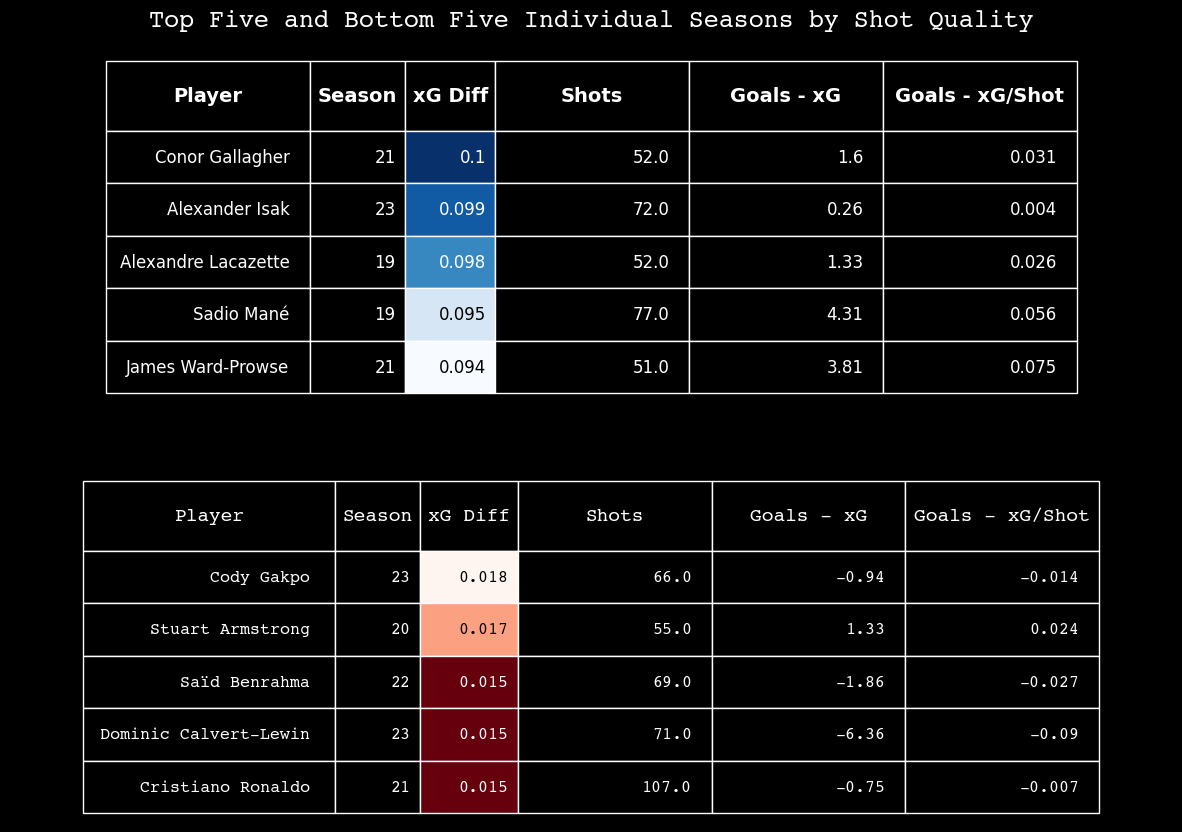

In [39]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
ax1.axis('off')
table1 = ax1.table(cellText=top_five_table.values, colLabels=top_five_table.columns, loc='center')
fig.patch.set_facecolor('black')
table1.auto_set_font_size(False)
table1.set_fontsize(12)
table1.auto_set_column_width([0, 1, 2])
row_heights = [0.15] * len(top_five_table) 
plt.rcParams['font.family'] = 'Courier'

for i, height in enumerate(row_heights):
    for key, cell in table1.get_celld().items():
        if key[0] == i + 1: 
            cell.set_height(height)

header_row_height = 0.2
for (i, j), cell in table1.get_celld().items():
    if i == 0: 
        cell.set_height(header_row_height)  
        cell.set_fontsize(14)
        cell.set_color('white')
        cell.set_edgecolor('white')
        cell.set_facecolor('black') 
        cell.set_text_props(weight='bold', color='white')

    else:  
        cell.set_edgecolor('white')
        cell.set_facecolor('black')
        cell.set_text_props(color='white')

xG_diff_values = top_five_table['xG Diff'].values
norm = plt.Normalize(vmin=np.min(xG_diff_values), vmax=np.max(xG_diff_values))
cmap = plt.get_cmap('Blues')

for i, (index, row) in enumerate(top_five_table.iterrows()):
    norm_value = norm(row['xG Diff'])
    color = cmap(norm_value)  
    cell = table1[(i + 1, 2)] 
    cell.set_facecolor(color)
    if i >= len(top_five_table) - 2:
        cell.set_text_props(color='black')
    else:
        if row['xG Diff'] > 4:
            cell.set_text_props(color='black')
        else:
            cell.set_text_props(color='white')

ax2.axis('off')
table2 = ax2.table(cellText=bottom_five_table.values, colLabels=bottom_five_table.columns, loc='center')
fig.patch.set_facecolor('black')
table2.auto_set_font_size(False)
table2.set_fontsize(12)
table2.auto_set_column_width([0, 1, 2])
row_heights = [0.15] * len(bottom_five_table) 
plt.rcParams['font.family'] = 'Courier'

for i, height in enumerate(row_heights):
    for key, cell in table2.get_celld().items():
        if key[0] == i + 1: 
            cell.set_height(height)

header_row_height = 0.2
for (i, j), cell in table2.get_celld().items():
    if i == 0: 
        cell.set_height(header_row_height)  
        cell.set_fontsize(14)
        cell.set_color('white')
        cell.set_edgecolor('white')
        cell.set_facecolor('black') 
        cell.set_text_props(weight='bold', color='white')

    else:  
        cell.set_edgecolor('white')
        cell.set_facecolor('black')
        cell.set_text_props(color='white')

xG_diff_values2 = bottom_five_table['xG Diff'].values
norm = plt.Normalize(vmin=np.min(xG_diff_values2), vmax=np.max(xG_diff_values2))
cmap = plt.get_cmap('Reds_r')

for i, (index, row) in enumerate(bottom_five_table.iterrows()):
    norm_value = norm(row['xG Diff'])
    color = cmap(norm_value)  
    cell = table2[(i + 1, 2)] 
    cell.set_facecolor(color)
    if i >= len(bottom_five_table) - 3:
        cell.set_text_props(color='white')
    else:
        if row['xG Diff'] > 3:
            cell.set_text_props(color='white')
        else:
            cell.set_text_props(color='black')

plt.title(
    'Top Five and Bottom Five Individual Seasons by Shot Quality',
    fontdict={'family': 'Courier', 'weight': 'bold', 'size': 18, 'color':'white'}, y=2.25)
plt.savefig('plots/topandbottom5.png', dpi=300)


## **Conclusion**

#### Shot quality does appear to be a useful metric to help analyse chances more than to analyse players. It does seem to possess the ability to allow shots to outperform their expected goal value but in this current simple way to look at it does not appear to be consistent across players over time. This does, however, open up the possibility for a better shot quality metric to be made, possibly building off the ideas of Zonal PSxG and Point xG but requiring more and better data, as well as likely more proven concepts to help evaluate player performance. Finally, stripping the idea of shot quality back further into optimal ball location and ball velocity, suggests that a path along those lines could also provide interesting insight into shot quality, which could be quantified in the same way of how it increases the probability of a goal being scored.